In [27]:
%%pyspark project.spark.compatibility


Line magic pip is not supported under current connected compute project.spark.compatibility. Please retry with allowed magics.


Connection: project.spark.compatibility | Run start time: 2025-10-14 14:27:01.173317 | Run duration : 0:00:00.794158s.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 get_ipython().run_cell_magic('pyspark', 'project.spark.compatibility', '%pip install -r      │
│   2                                                                                              │
│                                                                                                  │
│ /opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:2543 in run_cell_magic  │
│                                                                                                  │
│   2540 │   │   │                                                                                 │
│   2541 │   │   │   with self.builtin_trap:                                                       │
│   2542 │   │   │   │   args = (magic_arg_s, cell)                                                │
│ ❱ 2543 │   │   │   │   result = fn(*args, **kwargs)                                              │
│   2544 │   │   │                                                                                 │
│   2545 │   │   │   # The code below prevents the output from being displayed                     │
│   2546 │   │   │   # when using magics with decorator @output_can_be_silenced                    │
│                                                                                                  │
│ /opt/conda/lib/python3.11/site-packages/sagemaker_studio_dataengineering_sessions/sagemaker_conn │
│ ection_magic/sagemaker_connection_magic.py:213 in pyspark                                        │
│                                                                                                  │
│    210 │   │   try:                                                                              │
│    211 │   │   │   self._connect(connection_name, "python", cell)                                │
│    212 │   │   except Exception as e:                                                            │
│ ❱  213 │   │   │   raise e.with_traceback(None)                                                  │
│    214 │                                                                                         │
│    215 │   @cell_magic                                                                           │
│    216 │   @magic_arguments()                                                                    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NotAllowedSecondaryMagicException: Line magic pip is not supported under current connected compute 
project.spark.compatibility.

In [22]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import mlflow
from mlflow.tracking import MlflowClient
from catboost import CatBoostClassifier
from bid_predictor.bid_predictor import *
from bid_predictor.preprocessor import *
from bid_predictor.tracking import *
from matplotlib.pyplot import *
from sklearn.metrics import accuracy_score, recall_score, precision_score, matthews_corrcoef
from dotenv import load_dotenv
load_dotenv()

if in_sagemaker():
    arn = os.environ["MLFLOW_AWS_ARN"]
    mlflow.set_tracking_uri(arn)
    model_path = "models:/bid-predictor-cpu/2"
    train_file = "s3://amazon-sagemaker-622055002283-us-east-1-b37b41a56cd8/dzd_4dt0rvdnr1hoiv/5vt5uv9jpcqmxz/data/air_canada_and_lot/bid_data_enriched_new_reduced.csv"
else:
    mlflow.set_tracking_uri("file:///Users/christopher.gauthier/Documents/bid-predictor/mlruns")
    model_path = "runs:/593595e608e841f1a95ee9ccbdd8ca77/pipeline"
    train_file = "~/Documents/old-bid-predictor/bid_data_enriched_new.csv"

ModuleNotFoundError:No module named 'mlflow'
Unable to run statement for connection: project.spark.compatibility. Error: Code execution failed


Connection: project.spark.compatibility | Run start time: 2025-10-14 14:25:50.800118 | Run duration : 0:00:03.567659s.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 get_ipython().run_cell_magic('pyspark', 'project.spark.compatibility', 'import os\nimpor     │
│   2                                                                                              │
│                                                                                                  │
│ /opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:2543 in run_cell_magic  │
│                                                                                                  │
│   2540 │   │   │                                                                                 │
│   2541 │   │   │   with self.builtin_trap:                                                       │
│   2542 │   │   │   │   args = (magic_arg_s, cell)                                                │
│ ❱ 2543 │   │   │   │   result = fn(*args, **kwargs)                                              │
│   2544 │   │   │                                                                                 │
│   2545 │   │   │   # The code below prevents the output from being displayed                     │
│   2546 │   │   │   # when using magics with decorator @output_can_be_silenced                    │
│                                                                                                  │
│ /opt/conda/lib/python3.11/site-packages/sagemaker_studio_dataengineering_sessions/sagemaker_conn │
│ ection_magic/sagemaker_connection_magic.py:213 in pyspark                                        │
│                                                                                                  │
│    210 │   │   try:                                                                              │
│    211 │   │   │   self._connect(connection_name, "python", cell)                                │
│    212 │   │   except Exception as e:                                                            │
│ ❱  213 │   │   │   raise e.with_traceback(None)                                                  │
│    214 │                                                                                         │
│    215 │   @cell_magic                                                                           │
│    216 │   @magic_arguments()                                                                    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ExecutionException: Code execution failed

plot_predictions

plot_partial_dependence

get_object_importance # what is the difference between this and feature importance?

drop_unused_features


compare(self, model, data, metrics, ntree_start=0, ntree_end=0, eval_period=1, thread_count=-1, tmp_dir=None, plot_file=None, log_cout=None, log_cerr=None)
    Draw train and eval errors in Jupyter notebook for both models

calc_feature_statistics

In [4]:
pipeline = mlflow.sklearn.load_model(model_path)

In [5]:
data = pd.read_csv(
    train_file,
    parse_dates=["travel_date"],
    dtype={
        "carrier_code": "category",
        "flight_number": "category",
        "fare_class": "category",
    },
    low_memory=False,
)

In [16]:
data = data.sort_values(["travel_date", "carrier_code", "flight_number"]).reset_index(
    drop=True
)

In [17]:
data = data.fillna(
    {
        "multiplier_fare_class": 1.0,
        "multiplier_loyalty": 1.0,
        "multiplier_success_history": 1.0,
        "multiplier_payment_type": 1.0,
    }
)

In [18]:
cutoff = "2025-05-01"
yX_train = data[data.travel_date < cutoff][pre_features + ["offer_status"]]
yX_test = data[data.travel_date >= cutoff][pre_features + ["offer_status"]]

X_train,X_test = yX_train[pre_features], yX_test[pre_features]
y_train = (yX_train["offer_status"] == "TICKETED").astype(int)
y_test = (yX_test["offer_status"] == "TICKETED").astype(int)

In [19]:
prob_train = pipeline.predict_proba(X_train)

In [ ]:
prob_test = pipeline.predict_proba(X_test)

In [297]:
threshold = 0.5
acc_train = accuracy_score(y_train, (prob_train[:,1]>threshold).astype(int))
rec_train = recall_score(y_train, (prob_train[:,1]>threshold).astype(int))
pre_train = precision_score(y_train, (prob_train[:,1]>threshold).astype(int))
print("accuracy: ", acc_train)
print("recall: ", rec_train)
print("precision: ", pre_train)

accuracy:  0.9094781894444588
recall:  0.8953388809417604
precision:  0.8743190739405592


In [298]:
threshold = 0.5
acc = accuracy_score(y_test, (prob_test[:,1]>threshold).astype(int))
rec = recall_score(y_test, (prob_test[:,1]>threshold).astype(int))
pre = precision_score(y_test, (prob_test[:,1]>threshold).astype(int))
print("accuracy: ", acc)
print("recall: ", rec)
print("precision: ", pre)

accuracy:  0.8648699799386805
recall:  0.8418068328012579
precision:  0.8222180853539349


In [299]:
train_data = data[data.travel_date < cutoff].copy()
train_data["acceptance_prob"] = prob_train[:,1]
train_data["actual"] = (train_data["offer_status"] == "TICKETED").astype(int)

In [300]:
threshold = 0.5
train_data["prediction"] = (train_data["acceptance_prob"] > threshold).astype(int)

In [301]:
test_data = data[data.travel_date >= cutoff].copy()
test_data["acceptance_prob"] = prob_test[:,1]
test_data["actual"] = (test_data["offer_status"] == "TICKETED").astype(int)

In [ ]:
test_data["departure_local_date_time"] = pd.to_datetime(test_data["departure_local_date_time"])
test_data["decision_timestamp"] = pd.to_datetime(test_data["decision_timestamp"])
test_data["created"] = pd.to_datetime(test_data["created"])

In [302]:
threshold = 0.5
test_data["prediction"] = (test_data["acceptance_prob"] > threshold).astype(int)

In [303]:
test_data["guess"] = [np.random.binomial(1,.5)==1 for _ in range(test_data.shape[0])]

In [304]:
(test_data[test_data.actual==1].item_count*test_data[test_data.actual==1].usd_base_amount).sum()/1e6

np.float64(25.80389979)

In [305]:
(test_data[(test_data.actual==1)&(test_data.seats_available>=test_data.item_count)].item_count\
 *test_data[(test_data.actual==1)&(test_data.seats_available>=test_data.item_count)].usd_base_amount).sum()/1e6

np.float64(23.6719607)

In [306]:
(test_data[(test_data.prediction==1)&(test_data.seats_available>=test_data.item_count)].item_count\
 *test_data[(test_data.prediction==1)&(test_data.seats_available>=test_data.item_count)].usd_base_amount).sum()/1e6

np.float64(25.688231100000003)

In [265]:
test_data[(test_data.actual==0)&(test_data.prediction==1)&(test_data.seats_available>=test_data.item_count)][["carrier_code","flight_number","usd_base_amount","seats_available","item_count"]]

carrier_code flight_number  usd_base_amount  seats_available  \
502807           AC             1           382.78              6.0   
502809           AC             1           400.00              6.0   
502810           AC             1           384.23              6.0   
502812           AC             1           384.23              6.0   
502864           AC           128           320.78              4.0   
...             ...           ...              ...              ...   
608444           LO            80           937.48              1.0   
608461           AC            34           363.08              5.0   
608462           AC            34           363.08              7.0   
608464           AC            34           199.22              7.0   
608466           AC            34           449.84             15.0   

        item_count  
502807           1  
502809           2  
502810           2  
502812           1  
502864           1  
...            ...  
608444           1  
608461           2  
608462           2  
608464           1  
608466           2  

[5943 rows x 5 columns]

In [264]:
test_data[(test_data.actual==1)&(test_data.prediction==0)][["carrier_code","flight_number","usd_base_amount"]]

carrier_code flight_number  usd_base_amount
502839           AC           109           233.15
502840           AC           109           233.15
502843           AC           111           417.01
502898           AC          1638           195.85
502947           AC          1790           202.99
...             ...           ...              ...
608342           LO           303           157.14
608425           LO           719           138.18
608427           LO           727           124.49
608448           LO            80          1562.92
608474           AC           895           718.90

[6640 rows x 3 columns]

In [141]:
guess_metrics = []
for _ in range(500):
    guess = [np.random.binomial(1,.5)==1 for _ in range(test_data.shape[0])]
    acc_guess = accuracy_score(y_test, guess)
    rec_guess = recall_score(y_test, guess)
    pre_guess = precision_score(y_test, guess)
    mat_guess = matthews_corrcoef(y_test, guess)
    guess_metrics.append((acc_guess, rec_guess, pre_guess, mat_guess))
guess_metrics = pd.DataFrame(guess_metrics, columns=["accuracy", "recall", "precision", "matthews"])    

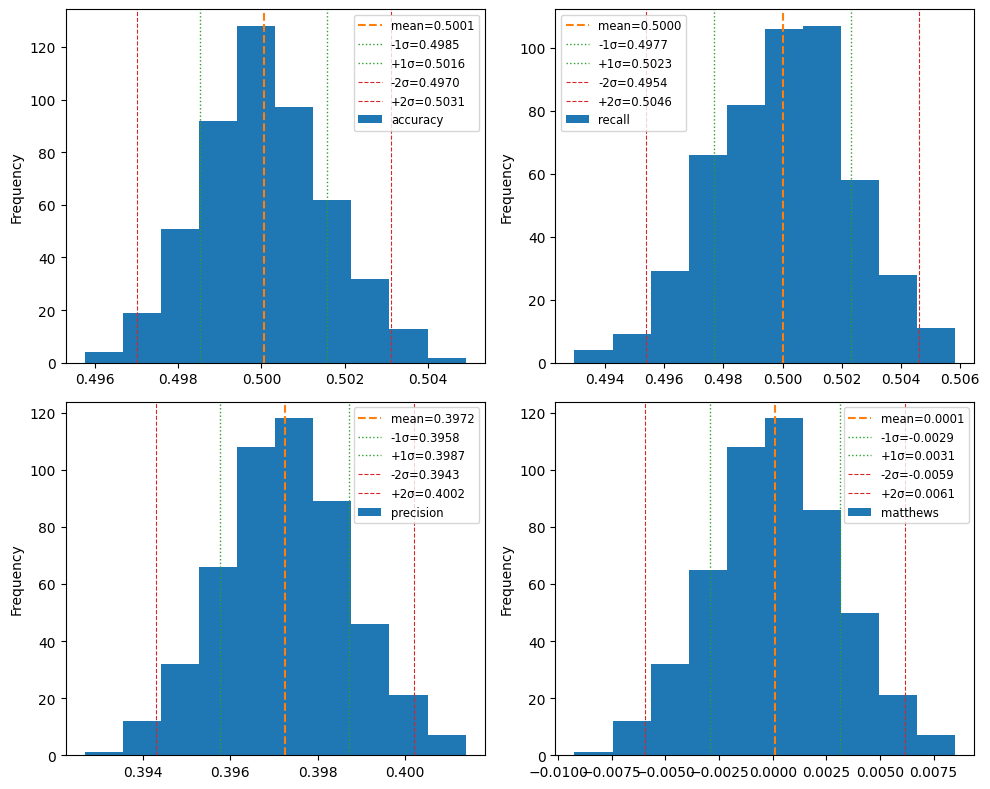

In [148]:
figure(figsize=(10,8))
for i,col in enumerate(guess_metrics.columns):
    ax = subplot(2,2,i+1)
    mu = guess_metrics[col].mean()
    sigma = guess_metrics[col].std()
    # mean
    ax.axvline(mu, color="C1", linestyle="--", linewidth=1.5, label=f"mean={mu:.4f}")
    # 1-sigma
    ax.axvline(mu - sigma, color="C2", linestyle=":", linewidth=1, label=f"-1σ={mu-sigma:.4f}")
    ax.axvline(mu + sigma, color="C2", linestyle=":", linewidth=1, label=f"+1σ={mu+sigma:.4f}")
    # 2-sigma
    ax.axvline(mu - 2*sigma, color="C3", linestyle="--", linewidth=0.8, label=f"-2σ={mu-2*sigma:.4f}")
    ax.axvline(mu + 2*sigma, color="C3", linestyle="--", linewidth=0.8, label=f"+2σ={mu+2*sigma:.4f}")
    guess_metrics[col].plot.hist(ax=ax)
    ax.legend(fontsize="small")
    tight_layout()

In [161]:
threshold = 0.5
acc = accuracy_score(y_test, test_data["prediction"])
rec = recall_score(y_test, test_data["prediction"])
pre = precision_score(y_test, test_data["prediction"])
mat = matthews_corrcoef(y_test, test_data["prediction"])

acc_guess, rec_guess, pre_guess, mat_guess =  guess_metrics.mean().values
acc_error, rec_error, pre_error, mat_error =  guess_metrics.std().values
print("accuracy: ", f"{acc:.4f}", " vs ", f"{acc_guess:.4f}\u00B1{acc_error:.4f}")
print("recall: ", f"{rec:.4f}", " vs ", f"{rec_guess:.4f}\u00B1{rec_error:.4f}")
print("precision: ", f"{pre:.4f}", " vs ", f"{pre_guess:.4f}\u00B1{pre_error:.4f}")
print("matthews: ", f"{mat:.4f}", " vs ", f"{mat_guess:.4f}\u00B1{mat_error:.4f}"  )

accuracy:  0.8649  vs  0.5001±0.0015
recall:  0.8418  vs  0.5000±0.0023
precision:  0.8222  vs  0.3972±0.0015
matthews:  0.7191  vs  0.0001±0.0030


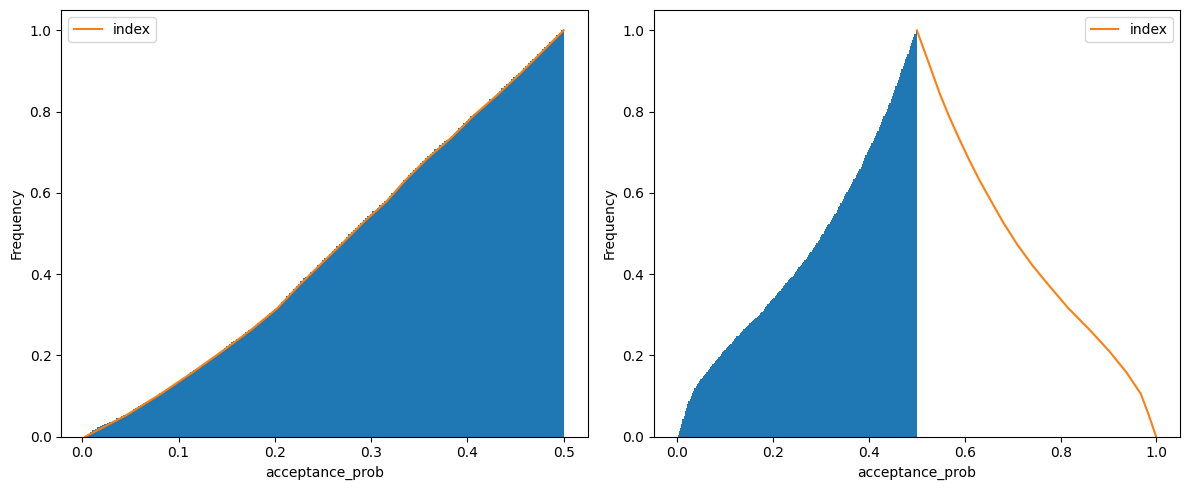

In [259]:
figure(figsize=(12,5))
ax = subplot(1,2,1)

d = test_data[(test_data.actual==1)&(test_data.acceptance_prob<=.5)]
d = d.acceptance_prob.quantile(np.linspace(0,1,20))#[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])
d = d.reset_index().set_index("acceptance_prob")
test_data[(test_data.actual==1)&(test_data.acceptance_prob<=.5)].acceptance_prob.plot.hist(ax=ax, bins=200, density=True, cumulative=True)
d.plot(ax=ax)
# ax.set_yscale("log")cv

ax = subplot(1,2,2)
d = test_data[(test_data.actual==0)&(test_data.acceptance_prob>.5)]
d = (1-d.acceptance_prob).quantile(np.linspace(0,1,20))#[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])
d = (1-d).reset_index().set_index("acceptance_prob")
(1-test_data[(test_data.actual==0)&(test_data.acceptance_prob>.5)].acceptance_prob).plot.hist(ax=ax, bins=200, density=True, cumulative=True)
d.plot(ax=ax)
# ax.set_yscale("log")
tight_layout()

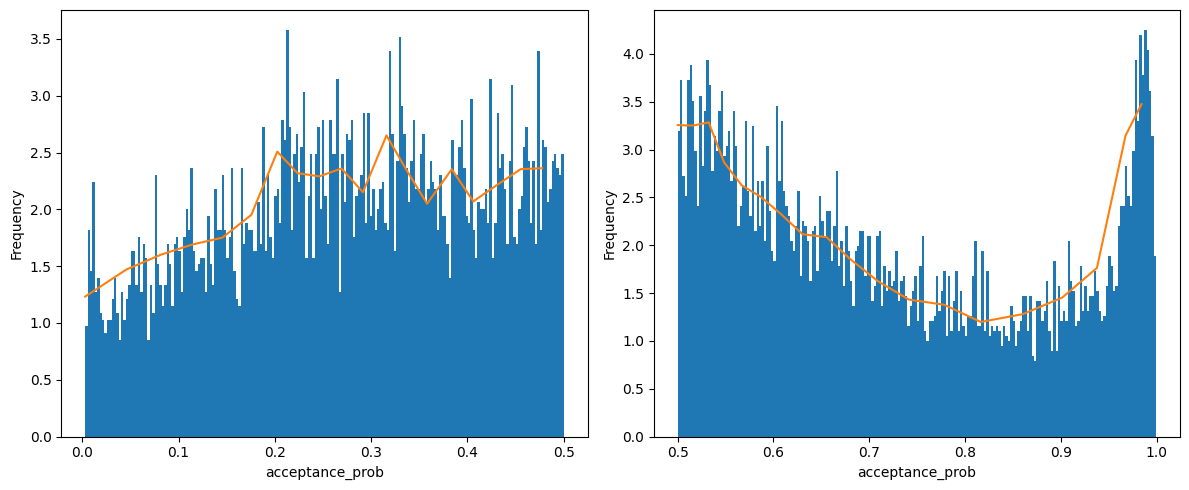

In [247]:


figure(figsize=(12,5))
ax = subplot(1,2,1)

d = test_data[(test_data.actual==1)&(test_data.acceptance_prob<=.5)]
d = d.acceptance_prob.quantile(np.linspace(0,1,20))#[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

d = d.reset_index().set_index("acceptance_prob", drop=False)
d = -d.diff(-1).dropna()
d = d["index"]/d.acceptance_prob
test_data[(test_data.actual==1)&(test_data.acceptance_prob<=.5)].acceptance_prob.plot.hist(ax=ax, bins=200, density=True)
d.plot(ax=ax)
# ax.set_yscale("log")cv

ax = subplot(1,2,2)
d = test_data[(test_data.actual==0)&(test_data.acceptance_prob>.5)]
d = d.acceptance_prob.quantile(np.linspace(0,1,20))#[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])
d = d.reset_index().set_index("acceptance_prob", drop=False)
d = -d.diff(-1).dropna()
d = d["index"]/d.acceptance_prob
test_data[(test_data.actual==0)&(test_data.acceptance_prob>.5)].acceptance_prob.plot.hist(ax=ax, bins=200, density=True)
d.plot(ax=ax)
# ax.set_yscale("log")
tight_layout()

In [176]:
test_data["guess"] = [np.random.uniform(0,1) for _ in range(test_data.shape[0])]

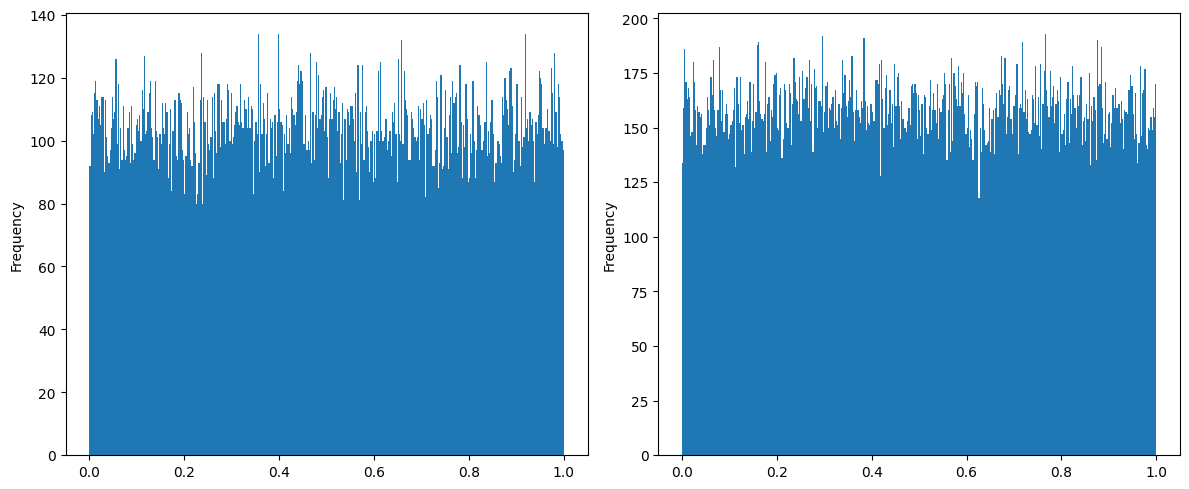

In [178]:
figure(figsize=(12,5))
ax = subplot(1,2,1)
test_data[(test_data.actual==1)&(test_data.acceptance_prob<=1.)].guess.plot.hist(ax=ax,bins=400)

ax = subplot(1,2,2)
test_data[(test_data.actual==0)&(test_data.acceptance_prob<=1.)].guess.plot.hist(ax=ax,bins=400)
tight_layout()

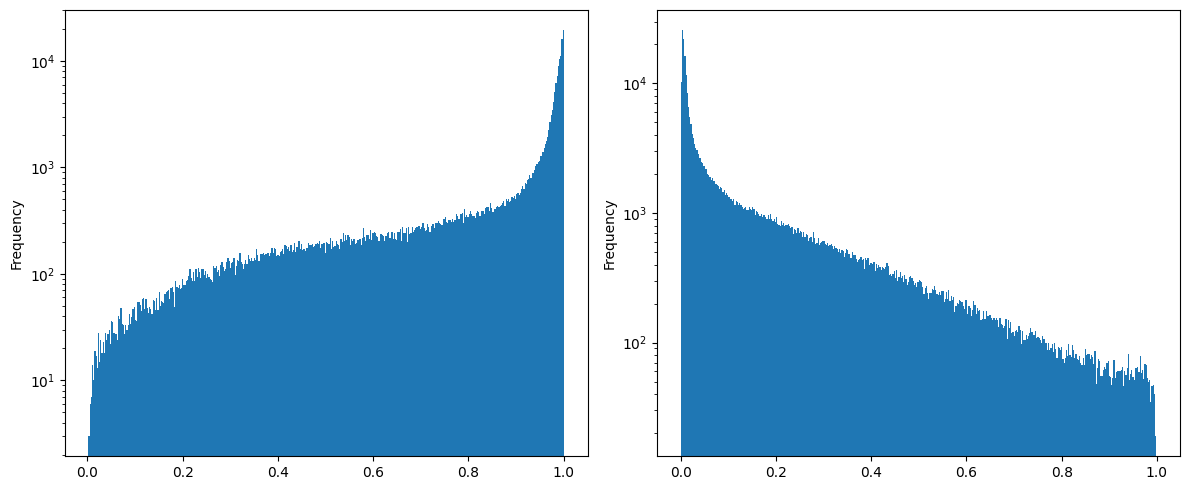

In [171]:
figure(figsize=(12,5))
ax = subplot(1,2,1)
train_data[(train_data.actual==1)&(train_data.acceptance_prob<=1.)].acceptance_prob.plot.hist(ax=ax,bins=400)
ax.set_yscale("log")

ax = subplot(1,2,2)
train_data[(train_data.actual==0)&(train_data.acceptance_prob<=1.)].acceptance_prob.plot.hist(ax=ax,bins=400)
ax.set_yscale("log")
tight_layout()

In [285]:
cnt = test_data.groupby(["carrier_code","flight_number","travel_date","upgrade_type"],observed=True).size().sort_values()
cnt

carrier_code  flight_number  travel_date  upgrade_type
LO            99             2025-09-15   P-ECON           1
              268            2025-06-23   BUS              1
                             2025-06-19   BUS              1
AC            741            2025-07-13   BUS              1
                             2025-07-14   BUS              1
                                                          ..
              34             2025-06-28   P-ECON          24
              33             2025-07-20   BUS             24
              895            2025-09-14   P-ECON          24
              34             2025-05-22   BUS             24
              33             2025-09-12   BUS             36
Length: 61097, dtype: int64

('LO', '79', Timestamp('2025-09-06 00:00:00'), 'BUS')

In [768]:
c = "LO"
n = "433"
d = "2025-05-01"

c = "AC"
n = "34"
d = "2025-06-28"

c = "LO"
n = "9"
d = "2025-09-15"
u = "BUS"

# c = "AC"
# n = "1"
# d = "2025-06-06"
# u = "P-ECON"

c,n,d,u = cnt[cnt>5].index[1000]

In [769]:
dd = test_data[(test_data.carrier_code==c)&(test_data.flight_number==n)&(test_data.travel_date==d)&(test_data.upgrade_type==u)]#.drop_duplicates()

In [32]:
%%pyspark project.spark.compatibility
import numpy as np
import pandas as pd

avail_cols = [
    "available_count_01h",
    "available_count_12h",
    "available_count_24h",
    "available_count_48h",
    "available_count_72h",
]

event_date_cols = [
    "event_local_date_01h",
    "event_local_date_12h",
    "event_local_date_24h",
    "event_local_date_48h",
    "event_local_date_72h",
]

def filter_by_date_with_availability(df: pd.DataFrame,
                                   current_date,
                                   created_col: str = "created",
                                   decision_timestamp_col: str = "decision_timestamp",
                                   event_date_cols: list = None,
                                   avail_cols: list = None,
                                   new_col: str = "current_available_seats") -> pd.DataFrame:
    """
    Filter rows of df by a given current_date and compute a current_available_seats value.

    Filtering rules:
    - If current_date is before 'created' -> row is filtered out.
    - If created <= current_date < decision_timestamp -> row is kept.
    - If current_date >= decision_timestamp -> row is filtered out.

    Availability rule (based on event_date_cols / avail_cols):
    - Consider the event_local_date_* columns in ordinal order (oldest to newest):
      event_local_date_01h, event_local_date_12h, event_local_date_24h,
      event_local_date_48h, event_local_date_72h
    - If current_date is before event_local_date_72h, use available_count_72h.
    - Otherwise, find the latest event_local_date_* that is <= current_date
      and use the corresponding available_count_* value.
    - If a matching available_count_* column is missing, result will be NaN for that row.

    Parameters:
    - df: input DataFrame
    - current_date: date against which to filter and compute availability
    - created_col: name of the 'created' column
    - decision_timestamp_col: name of the 'decision_timestamp' column
    - event_date_cols: list of event date column names in chronological order
                       (defaults to a standard set if None)
    - avail_cols: list of corresponding available_count column names in same order
                  as event_date_cols
    - new_col: name of the output column to store current availability

    Returns:
    - DataFrame filtered by the date rules with an added column 'new_col'
    """
    # Normalize current_date to Timestamp
    current_ts = pd.to_datetime(current_date)

    if created_col not in df.columns:
        raise KeyError(f"Column '{created_col}' not found in DataFrame.")
    if decision_timestamp_col not in df.columns:
        raise KeyError(f"Column '{decision_timestamp_col}' not found in DataFrame.")

    if event_date_cols is None:
        event_date_cols = [
            "event_local_date_01h",
            "event_local_date_12h",
            "event_local_date_24h",
            "event_local_date_48h",
            "event_local_date_72h",
        ][::-1]
    if avail_cols is None:
        avail_cols = [
            "available_count_01h",
            "available_count_12h",
            "available_count_24h",
            "available_count_48h",
            "available_count_72h",
        ][::-1]

    # Basic mask for filtering
    created_ts = pd.to_datetime(df[created_col])
    decision_ts = pd.to_datetime(df[decision_timestamp_col])

    mask = (created_ts <= current_ts) & (decision_ts > current_ts)

    # Function to pick the appropriate availability for a single row
    def pick_availability(row: pd.Series) -> np.float64:
        # If any of the event columns are missing, attempt to proceed with available_count_72h as a fallback
        # Build list of (event_date, avail_col) in chronological order
        for i, ev_col in enumerate(event_date_cols):
            if ev_col not in row or pd.isna(row.get(ev_col)):
                continue
            ev_ts = pd.to_datetime(row[ev_col])
            if current_ts < ev_ts:
                # current is before this event date; use the previous threshold's available count
                if i == 0:
                  # before the first event, use the last (72h) as per requirement
                    return current_ts, row.get(avail_cols[0], np.nan), avail_cols[0]
                else:
                    return current_ts, row.get(avail_cols[i - 1], np.nan), avail_cols[i - 1]
        # If we reach here, current_ts is after or equal to the last event date
        return current_ts, row.get(avail_cols[0], np.nan), avail_cols[0]

    # Compute current_available_seats per row
    df = df.copy()
    df[["current_timestamp", new_col, "current_seats_col"]] = df.apply(pick_availability, axis=1, result_type='expand')

    # Return only rows that satisfy the mask, with the new column in place
    return df.loc[mask]


Connection: project.spark.compatibility | Run start time: 2025-10-14 14:33:49.666044 | Run duration : 0:00:03.548429s.


In [33]:
%%pyspark project.spark.compatibility
import pandas as pd

def round_up_to_next_6h(dt):
    """
    Round a datetime (Timestamp, datetime, or string) up to the next 6-hour boundary.
    Boundaries are at 00:00, 06:00, 12:00, 18:00, etc.
    If dt is exactly on a boundary (e.g., 06:00:00), it will round up to the next boundary (12:00:00).
    """
    dt = pd.to_datetime(dt)
    seconds_in_6h = 1 * 3600

    # Keep timezone information if present
    midnight = dt.normalize()
    elapsed_seconds = dt.hour * 3600 + dt.minute * 60 + dt.second + dt.microsecond / 1e6

    # Compute the next boundary after the current time
    block = int(elapsed_seconds // seconds_in_6h)
    next_bound = midnight + pd.Timedelta(seconds=(block + 1) * seconds_in_6h)

    return next_bound

def round_down_to_next_6h(dt):
    """
    Round a datetime (Timestamp, datetime, or string) up to the next 6-hour boundary.
    Boundaries are at 00:00, 06:00, 12:00, 18:00, etc.
    If dt is exactly on a boundary (e.g., 06:00:00), it will round up to the next boundary (12:00:00).
    """
    dt = pd.to_datetime(dt)
    seconds_in_6h = 1 * 3600

    # Keep timezone information if present
    midnight = dt.normalize()
    elapsed_seconds = dt.hour * 3600 + dt.minute * 60 + dt.second + dt.microsecond / 1e6

    # Compute the next boundary after the current time
    block = int(elapsed_seconds // seconds_in_6h)
    next_bound = midnight - pd.Timedelta(seconds=(block + 1) * seconds_in_6h)

    return next_bound


Connection: project.spark.compatibility | Run start time: 2025-10-14 14:34:12.089754 | Run duration : 0:00:03.414405s.


In [34]:
%%pyspark project.spark.compatibility
def timestamps_between(ts: pd.Series) -> pd.Series:
    """
    Given a 1D array-like of timestamps, return a Series of midpoints
    between consecutive timestamps (sorted ascending).
    Result length will be len(ts) - 1.
    """
    ts = pd.to_datetime(ts).sort_values().reset_index(drop=True)
    if ts.size < 2:
        return pd.Series([], dtype='datetime64[ns]')
    mids = [
        ts.iloc[i] + (ts.iloc[i+1] - ts.iloc[i]) / 2
        for i in range(ts.size - 1)
    ]
    return pd.Series(mids)


def event_times_(df):
    decision_timestamps = df[["decision_timestamp"]].drop_duplicates()
    decision_timestamps.index = [f"decision_timestamp{i+1}" for i in range(len(decision_timestamps.index))]
    decision_timestamps.columns = [0]

    createds = df[["created"]].drop_duplicates()
    createds.index = [f"created{i+1}" for i in range(len(createds.index))]
    createds.columns = [0]

    event_dates = df[event_date_cols].drop_duplicates().T
    event_dates.columns = [0]

    times = pd.concat((decision_timestamps,createds,event_dates))
    times = pd.to_datetime(times[0])
    times = times.dropna().sort_values()
    return times 


def event_times(df):
    decision_timestamps = df[["decision_timestamp"]].drop_duplicates()
    decision_timestamps.index = [f"decision_timestamp{i+1}" for i in range(len(decision_timestamps.index))]
    decision_timestamps.columns = [0]

    createds = df[["created"]].drop_duplicates()
    createds.index = [f"created{i+1}" for i in range(len(createds.index))]
    createds.columns = [0]

    event_dates = df[event_date_cols].drop_duplicates().T
    event_dates.columns = [0]

    times = pd.concat((decision_timestamps,createds,event_dates))
    times = pd.to_datetime(times[0])
    times = times.dropna().sort_values()

    for ev_col in event_date_cols[::-1]:
        if ev_col in df and not pd.isna(df[ev_col].iloc[0]):
            event_time = df[ev_col].iloc[0]
            event_col = ev_col
            break

    times = times[times >= event_time].dropna()
    
    times["start_time"] = times[event_col] - pd.to_timedelta("2 day")
    times = times.sort_values()
    return times


Connection: project.spark.compatibility | Run start time: 2025-10-14 14:34:18.323093 | Run duration : 0:00:03.307502s.


In [35]:
%%pyspark project.spark.compatibility
def get_snapshots(df):
    dt_index = timestamps_between(event_times(df)).tolist()
    # start = round_down_to_next_6h(pd.to_datetime(df["event_local_date_72h"].iloc[0]))
    # end = round_up_to_next_6h(df["decision_timestamp"].max())
    # dt_index = pd.date_range(start=start, end=end, freq="1h")
    
    dfs = []
    i=1
    for dt in dt_index:
        _df = filter_by_date_with_availability(df,dt)
        if (len(dfs)==0 or not dfs[-1].drop(columns=["snapshot_num","current_timestamp"]).equals(_df.drop(columns=["current_timestamp"]))) and _df.shape[0]>0:
            _df["snapshot_num"] = i
            i+=1
            dfs.append(_df)
    try:
        dfs = pd.concat(dfs)
    except ValueError:
        print(dt_index)
        print(df.shape)
        # print(df[["carrier_code", "flight_number", "travel_date", "upgrade_type"]].drop_duplicates())
        raise ValueError
    return dfs


Connection: project.spark.compatibility | Run start time: 2025-10-14 14:35:42.874097 | Run duration : 0:00:03.362271s.


In [36]:
%%pyspark project.spark.compatibility
pre_features = [
    'carrier_code',
    'flight_number',
    'travel_date',
    'item_count',
    'usd_base_amount',
    # 'seats_available',
    'fare_class',
    'offer_time',
    'multiplier_fare_class',
    'multiplier_loyalty',
    'multiplier_success_history',
    'multiplier_payment_type',
    'upgrade_type'
] + [
    "decision_timestamp",
    "created"
] + event_date_cols + avail_cols


Connection: project.spark.compatibility | Run start time: 2025-10-14 14:35:46.242812 | Run duration : 0:00:03.445922s.


In [68]:
%%pyspark project.spark.compatibility
train_file = "s3://amazon-sagemaker-622055002283-us-east-1-b37b41a56cd8/dzd_4dt0rvdnr1hoiv/5vt5uv9jpcqmxz/data/air_canada_and_lot/bid_data_enriched_new.csv"
spark_df = spark.read.csv(train_file, header=True)


Connection: project.spark.compatibility | Run start time: 2025-10-14 15:26:10.735298 | Run duration : 0:00:03.470149s.


In [69]:
%%pyspark project.spark.compatibility
spark_df = spark_df.to_pandas_on_spark()


Connection: project.spark.compatibility | Run start time: 2025-10-14 15:26:16.340093 | Run duration : 0:00:03.559163s.


In [78]:
%%pyspark project.spark.compatibility
dde = spark_df.head()


Connection: project.spark.compatibility | Run start time: 2025-10-14 16:04:04.068118 | Run duration : 0:00:03.646176s.


In [83]:
%%pyspark project.spark.compatibility
dde = dde.to_pandas()


Connection: project.spark.compatibility | Run start time: 2025-10-14 16:07:18.654926 | Run duration : 0:00:07.197384s.


In [84]:
%%pyspark project.spark.compatibility
dde

Connection: project.spark.compatibility | Run start time: 2025-10-14 16:07:26.398836 | Run duration : 0:00:15.131369s.


In [80]:
%%pyspark project.spark.compatibility
help(spark_df.head)

Help on method head in module pyspark.pandas.frame:

head(n: int = 5) -> 'DataFrame' method of pyspark.pandas.frame.DataFrame instance
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    obj_head : same type as caller
        The first `n` rows of the caller object.
    
    Examples
    --------
    >>> df = ps.DataFrame({'animal':['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator
    1        bee
    2     falcon
    3       lion
    4     monkey
    5     parrot
    6      shark
    7      whale
    8      zebra
    
    Viewing the first 5 lines
    
    >>> df.head()
          animal
    0  alligator


In [77]:
%%pyspark project.spark.compatibility
dir(spark_df.event_local_date_72h)


['T', '__abs__', '__abstractmethods__', '__add__', '__and__', '__annotations__', '__array_ufunc__', '__bool__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__invert__', '__iter__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__orig_bases__', '__parameters__', '__pow__', '__radd__', '__rand__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '__xor__', '_abc_impl', '_anchor', '_apply_series_op', '_build_groupby', '_col_label', '_column_label', '_count_expr', '_cum', '_cumprod', '_cumsum', '_

In [73]:
%%pyspark project.spark.compatibility
help(spark.read.csv)

Help on method csv in module pyspark.sql.readwriter:

csv(path: Union[str, List[str]], schema: Union[pyspark.sql.types.StructType, str, NoneType] = None, sep: Optional[str] = None, encoding: Optional[str] = None, quote: Optional[str] = None, escape: Optional[str] = None, comment: Optional[str] = None, header: Union[bool, str, NoneType] = None, inferSchema: Union[bool, str, NoneType] = None, ignoreLeadingWhiteSpace: Union[bool, str, NoneType] = None, ignoreTrailingWhiteSpace: Union[bool, str, NoneType] = None, nullValue: Optional[str] = None, nanValue: Optional[str] = None, positiveInf: Optional[str] = None, negativeInf: Optional[str] = None, dateFormat: Optional[str] = None, timestampFormat: Optional[str] = None, maxColumns: Union[str, int, NoneType] = None, maxCharsPerColumn: Union[str, int, NoneType] = None, maxMalformedLogPerPartition: Union[str, int, NoneType] = None, mode: Optional[str] = None, columnNameOfCorruptRecord: Optional[str] = None, multiLine: Union[bool, str, NoneType] 

In [71]:
%%pyspark project.spark.compatibility
[x for x in dir(ps.re) if not x.startswith("_")]


['Any', 'CategoricalIndex', 'DataFrame', 'DatetimeIndex', 'Float64Index', 'Index', 'Int64Index', 'LooseVersion', 'MissingPandasLikeGeneralFunctions', 'MissingPandasLikeScalars', 'MultiIndex', 'NamedAgg', 'Series', 'TimedeltaIndex', 'accessors', 'base', 'broadcast', 'categorical', 'concat', 'config', 'correlation', 'data_type_ops', 'date_range', 'datetimes', 'exceptions', 'frame', 'from_pandas', 'generic', 'get_dummies', 'get_option', 'groupby', 'indexes', 'indexing', 'internal', 'isna', 'isnull', 'melt', 'merge', 'merge_asof', 'missing', 'namespace', 'notna', 'notnull', 'option_context', 'options', 'os', 'plot', 'pyarrow', 'range', 'read_clipboard', 'read_csv', 'read_delta', 'read_excel', 'read_html', 'read_json', 'read_orc', 'read_parquet', 'read_spark_io', 'read_sql', 'read_sql_query', 'read_sql_table', 'read_table', 'require_minimum_pandas_version', 'require_minimum_pyarrow_version', 'reset_option', 'series', 'set_option', 'spark', 'sql', 'sql_formatter', 'strings', 'sys', 'timedel

In [63]:
%%pyspark project.spark.compatibility
import pyspark.pandas as ps

# Define a custom function to apply to each group
def custom_transform(group_df):# -> ps.DataFrame[str, int]:
    return ps.from_pandas(get_snapshots(group_df))
# Enter your code at the start of this line to replace this comment


Connection: project.spark.compatibility | Run start time: 2025-10-14 14:53:11.323336 | Run duration : 0:00:03.350723s.


In [45]:
%%pyspark project.spark.compatibility
# Create a sample pandas-on-Spark DataFrame
df = ps.DataFrame({'key': ['A', 'B', 'A', 'C', 'B'],
                   'value': [1, 2, 3, 4, 5]})
# Enter your code at the start of this line to replace this comment


Connection: project.spark.compatibility | Run start time: 2025-10-14 14:44:10.935429 | Run duration : 0:00:03.395695s.


In [47]:
%%pyspark project.spark.compatibility
type(df)


<class 'pyspark.pandas.frame.DataFrame'>
Connection: project.spark.compatibility | Run start time: 2025-10-14 14:45:15.170056 | Run duration : 0:00:09.407405s.


In [57]:
%%pyspark project.spark.compatibility
type(spark_df)


<class 'pyspark.pandas.frame.DataFrame'>
Connection: project.spark.compatibility | Run start time: 2025-10-14 14:50:58.924881 | Run duration : 0:00:09.521854s.


In [66]:
%%pyspark project.spark.compatibility
spark_df

TypeError:DataFrame.to_parquet() missing 1 required positional argument: 'path'


a bytes-like object is required, not 'NoneType'


Connection: project.spark.compatibility | Run start time: 2025-10-14 15:22:44.977922 | Run duration : 0:00:22.244966s.


In [85]:
%%pyspark project.spark.compatibility
spark_df_trans = spark_df.groupby(["carrier_code", "travel_date",  "flight_number", "upgrade_type"]).apply(custom_transform)

ValueError:unconverted data remains when parsing with format "%Y-%m-%d %H:%M:%S": ".238", at position 6. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
Unable to run statement for connection: project.spark.compatibility. Error: Code execution failed


Connection: project.spark.compatibility | Run start time: 2025-10-14 16:08:21.387630 | Run duration : 0:00:12.966627s.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 get_ipython().run_cell_magic('pyspark', 'project.spark.compatibility', 'spark_df_trans =     │
│   2                                                                                              │
│                                                                                                  │
│ /opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:2543 in run_cell_magic  │
│                                                                                                  │
│   2540 │   │   │                                                                                 │
│   2541 │   │   │   with self.builtin_trap:                                                       │
│   2542 │   │   │   │   args = (magic_arg_s, cell)                                                │
│ ❱ 2543 │   │   │   │   result = fn(*args, **kwargs)                                              │
│   2544 │   │   │                                                                                 │
│   2545 │   │   │   # The code below prevents the output from being displayed                     │
│   2546 │   │   │   # when using magics with decorator @output_can_be_silenced                    │
│                                                                                                  │
│ /opt/conda/lib/python3.11/site-packages/sagemaker_studio_dataengineering_sessions/sagemaker_conn │
│ ection_magic/sagemaker_connection_magic.py:213 in pyspark                                        │
│                                                                                                  │
│    210 │   │   try:                                                                              │
│    211 │   │   │   self._connect(connection_name, "python", cell)                                │
│    212 │   │   except Exception as e:                                                            │
│ ❱  213 │   │   │   raise e.with_traceback(None)                                                  │
│    214 │                                                                                         │
│    215 │   @cell_magic                                                                           │
│    216 │   @magic_arguments()                                                                    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ExecutionException: Code execution failed

In [64]:
%%pyspark project.spark.compatibility
spark_df_trans = spark_df.groupby(["carrier_code", "flight_number", "travel_date", "upgrade_type"]).apply(custom_transform)

ValueError:unconverted data remains when parsing with format "%Y-%m-%d %H:%M:%S": ".196", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
Unable to run statement for connection: project.spark.compatibility. Error: Code execution failed


Connection: project.spark.compatibility | Run start time: 2025-10-14 14:53:18.241948 | Run duration : 0:00:10.648771s.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 get_ipython().run_cell_magic('pyspark', 'project.spark.compatibility', 'spark_df_trans =     │
│   2                                                                                              │
│                                                                                                  │
│ /opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:2543 in run_cell_magic  │
│                                                                                                  │
│   2540 │   │   │                                                                                 │
│   2541 │   │   │   with self.builtin_trap:                                                       │
│   2542 │   │   │   │   args = (magic_arg_s, cell)                                                │
│ ❱ 2543 │   │   │   │   result = fn(*args, **kwargs)                                              │
│   2544 │   │   │                                                                                 │
│   2545 │   │   │   # The code below prevents the output from being displayed                     │
│   2546 │   │   │   # when using magics with decorator @output_can_be_silenced                    │
│                                                                                                  │
│ /opt/conda/lib/python3.11/site-packages/sagemaker_studio_dataengineering_sessions/sagemaker_conn │
│ ection_magic/sagemaker_connection_magic.py:213 in pyspark                                        │
│                                                                                                  │
│    210 │   │   try:                                                                              │
│    211 │   │   │   self._connect(connection_name, "python", cell)                                │
│    212 │   │   except Exception as e:                                                            │
│ ❱  213 │   │   │   raise e.with_traceback(None)                                                  │
│    214 │                                                                                         │
│    215 │   @cell_magic                                                                           │
│    216 │   @magic_arguments()                                                                    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ExecutionException: Code execution failed

In [857]:
test_data[:232][pre_features]

carrier_code flight_number travel_date  item_count  usd_base_amount fare_class  offer_time  multiplier_fare_class  multiplier_loyalty  multiplier_success_history  multiplier_payment_type upgrade_type  decision_timestamp             created     event_local_date_01h     event_local_date_12h     event_local_date_24h     event_local_date_48h     event_local_date_72h  available_count_01h  available_count_12h  available_count_24h  available_count_48h  available_count_72h
502807           AC             1  2025-05-01           1           382.78          K   64.729618                   1.00                 1.0                         1.0                      1.4       P-ECON 2025-04-30 05:25:49 2025-02-25 19:44:21  2025-05-01 12:08:42.478  2025-05-01 00:16:46.254  2025-04-30 12:17:37.363  2025-04-29 13:31:17.607  2025-04-28 13:05:40.059                  1.0                  0.0                  1.0                  6.0                  6.0
502808           AC             1  2025-05-01           2           398.76          T    5.885336                   1.03                 1.0                         1.0                      1.4       P-ECON 2025-04-29 17:31:18 2025-04-25 16:00:07  2025-05-01 12:08:42.478  2025-05-01 00:16:46.254  2025-04-30 12:17:37.363  2025-04-29 13:31:17.607  2025-04-28 13:05:40.059                  1.0                  0.0                  1.0                  6.0                  6.0
502809           AC             1  2025-05-01           2           400.00          L    7.041597                   1.02                 1.0                         1.0                      1.0       P-ECON 2025-04-30 05:25:49 2025-04-24 12:15:06  2025-05-01 12:08:42.478  2025-05-01 00:16:46.254  2025-04-30 12:17:37.363  2025-04-29 13:31:17.607  2025-04-28 13:05:40.059                  1.0                  0.0                  1.0                  6.0                  6.0
502810           AC             1  2025-05-01           2           384.23          K   15.681007                   1.00                 1.0                         1.0                      1.0       P-ECON 2025-04-30 05:25:49 2025-04-15 20:54:21  2025-05-01 12:08:42.478  2025-05-01 00:16:46.254  2025-04-30 12:17:37.363  2025-04-29 13:31:17.607  2025-04-28 13:05:40.059                  1.0                  0.0                  1.0                  6.0                  6.0
502811           AC             1  2025-05-01           1           382.78          T    2.328704                   1.03                 1.0                         1.0                      1.4       P-ECON 2025-04-29 17:31:18 2025-04-29 05:21:40  2025-05-01 12:08:42.478  2025-05-01 00:16:46.254  2025-04-30 12:17:37.363  2025-04-29 13:31:17.607  2025-04-28 13:05:40.059                  1.0                  0.0                  1.0                  6.0                  6.0
...             ...           ...         ...         ...              ...        ...         ...                    ...                 ...                         ...                      ...          ...                 ...                 ...                      ...                      ...                      ...                      ...                      ...                  ...                  ...                  ...                  ...                  ...
503034           AC           314  2025-05-01           1           302.59          G    3.933993                   1.06                 1.0                         1.0                      1.0          BUS 2025-04-30 18:11:46 2025-04-28 00:35:03                      NaN  2025-05-01 10:15:43.372  2025-04-30 22:12:30.047  2025-04-29 23:11:15.732  2025-04-28 22:17:05.279                  NaN                  0.0                  0.0                  1.0                  1.0
503035           AC           326  2025-05-01           1           158.80          G   44.673900                   1.06                 1.0                         1.0                      1

In [837]:
test_data.shape

(105676, 208)

In [858]:
grps = test_data[:232].groupby(["carrier_code", "flight_number", "travel_date", "upgrade_type"],observed=True).apply(get_snapshots,include_groups=False)

ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

In [ ]:
grps.reset_index()[pre_features + ["current_timestamp", "current_available_seats", "current_seats_col", "snapshot_num"]]

carrier_code flight_number travel_date  item_count  usd_base_amount fare_class  offer_time  multiplier_fare_class  multiplier_loyalty  multiplier_success_history  multiplier_payment_type upgrade_type  decision_timestamp             created     event_local_date_01h     event_local_date_12h     event_local_date_24h     event_local_date_48h     event_local_date_72h  available_count_01h  available_count_12h  available_count_24h  available_count_48h  available_count_72h          current_timestamp  current_available_seats    current_seats_col  snapshot_num
0            AC             1  2025-05-01           1           382.78          K   64.729618                   1.00                1.00                         1.0                      1.4       P-ECON 2025-04-30 05:25:49 2025-02-25 19:44:21  2025-05-01 12:08:42.478  2025-05-01 00:16:46.254  2025-04-30 12:17:37.363  2025-04-29 13:31:17.607  2025-04-28 13:05:40.059                  1.0                  0.0                  1.0                  6.0                  6.0 2025-04-27 13:05:40.059000                      6.0  available_count_72h             1
1            AC             1  2025-05-01           2           398.76          T    5.885336                   1.03                1.00                         1.0                      1.4       P-ECON 2025-04-29 17:31:18 2025-04-25 16:00:07  2025-05-01 12:08:42.478  2025-05-01 00:16:46.254  2025-04-30 12:17:37.363  2025-04-29 13:31:17.607  2025-04-28 13:05:40.059                  1.0                  0.0                  1.0                  6.0                  6.0 2025-04-27 13:05:40.059000                      6.0  available_count_72h             1
2            AC             1  2025-05-01           2           400.00          L    7.041597                   1.02                1.00                         1.0                      1.0       P-ECON 2025-04-30 05:25:49 2025-04-24 12:15:06  2025-05-01 12:08:42.478  2025-05-01 00:16:46.254  2025-04-30 12:17:37.363  2025-04-29 13:31:17.607  2025-04-28 13:05:40.059                  1.0                  0.0                  1.0                  6.0                  6.0 2025-04-27 13:05:40.059000                      6.0  available_count_72h             1
3            AC             1  2025-05-01           2           384.23          K   15.681007                   1.00                1.00                         1.0                      1.0       P-ECON 2025-04-30 05:25:49 2025-04-15 20:54:21  2025-05-01 12:08:42.478  2025-05-01 00:16:46.254  2025-04-30 12:17:37.363  2025-04-29 13:31:17.607  2025-04-28 13:05:40.059                  1.0                  0.0                  1.0                  6.0                  6.0 2025-04-27 13:05:40.059000                      6.0  available_count_72h             1
4            AC             1  2025-05-01           1           382.78          K   64.729618                   1.00                1.00                         1.0                      1.4       P-ECON 2025-04-30 05:25:49 2025-02-25 19:44:21  2025-05-01 12:08:42.478  2025-05-01 00:16:46.254  2025-04-30 12:17:37.363  2025-04-29 13:31:17.607  2025-04-28 13:05:40.059                  1.0                  0.0                  1.0                  6.0                  6.0 2025-04-29 09:08:32.500000                      6.0  available_count_72h             2
5            AC             1  2025-05-01           2           398.76          T    5.885336                   1.03                1.00                         1.0                      1.4       P-ECON 2025-04-29 17:31:18 2025-04-25 16:00:07  2025-05-01 12:08:42.478  2025-05-01 00:16:46.254  2025-04-30 12:17:37.363  2025-04-29 13:31:17.607  2025-04-28 13:05:40.059                  1.0                  0.0                  1.0                  6.0                  6.0 2025-04-29 09:08:32.500000                      6.0  available_count_72h             2
6            AC             1  2025-05-01           2           400.00          L  

In [773]:
d3 = get_snapshots(dd[pre_features])#[pre_features + ["current_timestamp","current_available_seats","current_seats_col","snapshot_num","decision_timestamp"]]

In [776]:
dd.shape

(9, 208)

In [779]:
d3[d3.snapshot_num==2][pre_features + ["current_timestamp", "current_available_seats", "current_seats_col", "snapshot_num"]]

carrier_code flight_number travel_date  item_count  usd_base_amount fare_class  offer_time  multiplier_fare_class  multiplier_loyalty  multiplier_success_history  multiplier_payment_type upgrade_type  decision_timestamp             created event_local_date_01h     event_local_date_12h     event_local_date_24h     event_local_date_48h     event_local_date_72h  available_count_01h  available_count_12h  available_count_24h  available_count_48h  available_count_72h       current_timestamp  current_available_seats    current_seats_col  snapshot_num
602873           AC           816  2025-09-12           1          1069.76          T   93.130035                   1.03                 1.0                         1.0                      1.0          BUS 2025-09-10 23:11:27 2025-06-11 16:02:45                  NaN  2025-09-12 07:22:21.700  2025-09-11 19:08:35.643  2025-09-10 19:21:40.445  2025-09-09 19:20:08.567                  NaN                  1.0                  4.0                  4.0                  5.0 2025-09-10 07:20:54.506                      5.0  available_count_72h             2
602874           AC           816  2025-09-12           2           534.88          O  107.703484                   1.20                 1.0                         1.0                      1.0          BUS 2025-09-11 11:11:51 2025-05-28 02:16:59                  NaN  2025-09-12 07:22:21.700  2025-09-11 19:08:35.643  2025-09-10 19:21:40.445  2025-09-09 19:20:08.567                  NaN                  1.0                  4.0                  4.0                  5.0 2025-09-10 07:20:54.506                      5.0  available_count_72h             2
602875           AC           816  2025-09-12           2           758.95          V   46.823993                   1.17                 1.0                         1.0                      1.0          BUS 2025-09-11 11:11:51 2025-07-27 23:23:27                  NaN  2025-09-12 07:22:21.700  2025-09-11 19:08:35.643  2025-09-10 19:21:40.445  2025-09-09 19:20:08.567                  NaN                  1.0                  4.0                  4.0                  5.0 2025-09-10 07:20:54.506                      5.0  available_count_72h             2
602876           AC           816  2025-09-12           2           921.58          A   22.763993                   1.00                 1.0                         1.0                      1.0          BUS 2025-09-11 11:11:51 2025-08-21 00:49:51                  NaN  2025-09-12 07:22:21.700  2025-09-11 19:08:35.643  2025-09-10 19:21:40.445  2025-09-09 19:20:08.567                  NaN                  1.0                  4.0                  4.0                  5.0 2025-09-10 07:20:54.506                      5.0  available_count_72h             2
602877           AC           816  2025-09-12           2           751.72          S    9.305567                   1.05                 1.0                         1.0                      1.0          BUS 2025-09-11 11:11:51 2025-09-03 11:49:59                  NaN  2025-09-12 07:22:21.700  2025-09-11 19:08:35.643  2025-09-10 19:21:40.445  2025-09-09 19:20:08.567                  NaN                  1.0                  4.0                  4.0                  5.0 2025-09-10 07:20:54.506                      5.0  available_count_72h             2
602879           AC           816  2025-09-12           2           762.56          T    7.774491                   1.03                 1.0                         1.0                      1.0          BUS 2025-09-11 11:11:51 2025-09-05 00:34:44                  NaN  2025-09-12 07:22:21.700  2025-09-11 19:08:35.643  2025-09-10 19:21:40.445  2025-09-09 19:20:08.567                  NaN                  1.0                  4.0                  4.0                  5.0 2025-09-10 07:20:54.506                      5.0  available_count_72h             2
602880           AC           816  2025-09-12           2           733.65          W    7.654873           

In [ ]:
decision_timestamps = dd[["decision_timestamp"]].drop_duplicates()
decision_timestamps.index = [f"decision_timestamp{i+1}" for i in range(len(decision_timestamps.index))]
decision_timestamps.columns = [0]

createds = dd[["created"]].drop_duplicates()
createds.index = [f"created{i+1}" for i in range(len(createds.index))]
createds.columns = [0]

event_dates = dd[event_date_cols].drop_duplicates().T
event_dates.columns = [0]

times = pd.concat((decision_timestamps,createds,event_dates))
times[0] = pd.to_datetime(times[0])

In [696]:
times.sort_values(0)

0
created2             2025-04-19 23:45:27.000
created1             2025-06-08 00:54:46.000
created5             2025-06-11 07:51:09.000
created3             2025-06-16 11:54:19.000
created4             2025-06-16 21:25:40.000
created6             2025-06-23 10:38:05.000
event_local_date_72h 2025-06-24 14:23:26.919
decision_timestamp2  2025-06-25 13:12:29.000
event_local_date_48h 2025-06-25 14:14:02.879
decision_timestamp1  2025-06-26 01:11:20.000
event_local_date_24h 2025-06-26 14:03:28.407
event_local_date_12h 2025-06-27 02:20:51.011
event_local_date_01h                     NaT

In [704]:
times

0
decision_timestamp1  2025-06-26 01:11:20.000
decision_timestamp2  2025-06-25 13:12:29.000
created1             2025-06-08 00:54:46.000
created2             2025-04-19 23:45:27.000
created3             2025-06-16 11:54:19.000
created4             2025-06-16 21:25:40.000
created5             2025-06-11 07:51:09.000
created6             2025-06-23 10:38:05.000
event_local_date_01h                     NaT
event_local_date_12h 2025-06-27 02:20:51.011
event_local_date_24h 2025-06-26 14:03:28.407
event_local_date_48h 2025-06-25 14:14:02.879
event_local_date_72h 2025-06-24 14:23:26.919

In [707]:
pd.concat((timestamps_between(times[0]),times[0])).sort_values()

created2               2025-04-19 23:45:27.000000
0                      2025-05-14 12:20:06.500000
created1               2025-06-08 00:54:46.000000
1                      2025-06-09 16:22:57.500000
created5               2025-06-11 07:51:09.000000
2                      2025-06-13 21:52:44.000000
created3               2025-06-16 11:54:19.000000
3                      2025-06-16 16:39:59.500000
created4               2025-06-16 21:25:40.000000
4                      2025-06-20 04:01:52.500000
created6               2025-06-23 10:38:05.000000
5                      2025-06-24 00:30:45.959500
event_local_date_72h   2025-06-24 14:23:26.919000
6                      2025-06-25 01:47:57.959500
decision_timestamp2    2025-06-25 13:12:29.000000
7                      2025-06-25 13:43:15.939500
event_local_date_48h   2025-06-25 14:14:02.879000
8                      2025-06-25 19:42:41.439500
decision_timestamp1    2025-06-26 01:11:20.000000
9                      2025-06-26 07:37:24.203500


In [697]:
d4 = d3[["current_timestamp"]].drop_duplicates()
d4.index = [f"step{i+1}" for i in range(len(d4.index))]
d4.columns = [0]

In [698]:
pd.concat((times,d4)).sort_values(0)

0
created2             2025-04-19 23:45:27.000
created1             2025-06-08 00:54:46.000
created5             2025-06-11 07:51:09.000
created3             2025-06-16 11:54:19.000
created4             2025-06-16 21:25:40.000
step1                2025-06-23 09:00:00.000
created6             2025-06-23 10:38:05.000
step2                2025-06-23 11:00:00.000
event_local_date_72h 2025-06-24 14:23:26.919
decision_timestamp2  2025-06-25 13:12:29.000
step3                2025-06-25 14:00:00.000
event_local_date_48h 2025-06-25 14:14:02.879
step4                2025-06-25 15:00:00.000
decision_timestamp1  2025-06-26 01:11:20.000
event_local_date_24h 2025-06-26 14:03:28.407
event_local_date_12h 2025-06-27 02:20:51.011
event_local_date_01h                     NaT

In [690]:
filter_by_date_with_availability(dd,"2025-08-06 00:00:00")[pre_features + ["offer_status"]]

Empty DataFrame
Columns: [carrier_code, flight_number, travel_date, item_count, usd_base_amount, seats_available, fare_class, offer_time, multiplier_fare_class, multiplier_loyalty, multiplier_success_history, multiplier_payment_type, upgrade_type, offer_status]
Index: []

In [676]:
d3.groupby(["current_seats_col","current_timestamp","decision_timestamp","current_available_seats","snapshot_num"]).size().reset_index().sort_values("snapshot_num")

current_seats_col   current_timestamp  decision_timestamp  current_available_seats  snapshot_num  0
2  available_count_72h 2025-08-02 01:00:00 2025-08-05 01:20:15                     21.0             1  3
3  available_count_72h 2025-08-03 14:00:00 2025-08-05 01:20:15                     21.0             2  4
4  available_count_72h 2025-08-04 19:00:00 2025-08-05 01:20:15                     21.0             3  5
1  available_count_48h 2025-08-04 23:00:00 2025-08-05 01:20:15                     13.0             4  5
0  available_count_24h 2025-08-06 05:00:00 2025-08-06 05:31:02                     13.0             5  1

In [673]:
d3 = get_snapshots(dd)
d3

id  partner_id  product_id  payment_id  payment_aux_id carrier_code marketing_carrier flight_number  marketing_flight_num from_cabin upgrade_type conf_num   travel_dt  dow fare_class cur_code  base_amount  amount  item_count  points_exch_rate  installment_count  offer_chg_cutoff  mod_cutoff_hour_before_depart offer_status  on_hold  hold_timestamp  hold_user_id  hold_email_sent  rejected rejected_timestamp  rejected_user_id  autorebookfailure upgrade_verified  display_fx_rate  settlement_fx_rate  equiv_amount  equiv_amount_pretax equiv_cur_code offer_language_code                                 channel_source             created expiration_timestamp point_of_sale orig_payment_type total_fare_cur_code  total_fare_amt  upgrade_user_id    upgrade_timestamp  ticketing_user_id  ticketing_timestamp  ... available_count_72h  raw_available_count_72h  authorized_capacity_72h  operational_capacity_72h  booked_seats_72h  waitlisted_seats_72h load_factor_72h      update_time_72h  \
577773  41182537          20     1216730    33853834             NaN           LO                LO            27                    27       ECON          BUS   XCL3GD  2025-08-06    8          S      USD       944.00   952.0           1               NaN                0.0                 0                           13.0     TICKETED        0             NaN           NaN                0         0                NaN               NaN                NaN       UNVERIFIED              NaN            3.690350       3513.21                  NaN            PLN                  en                                     MY_BOOKING 2025-07-21 14:42:46                  NaN            US                CC                 USD             0.0            229.0  2025-08-05 01:20:15              229.0  2025-08-05 01:20:49  ...                21.0                     21.0                     30.0                      30.0               9.0                   0.0             0.3  2025-08-04 02:14:35   
577775  40214722          20     1216730    33090296             NaN           LO                LO            27                    27     P-ECON          BUS   A4XHK5  2025-08-06    8          R      USD      1055.00  1063.0           1               NaN                0.0                 0                           13.0     TICKETED        0             NaN           NaN                0         0                NaN               NaN                NaN       UNVERIFIED              NaN            3.690350       3922.84                  NaN            PLN                  en                                     MY_BOOKING 2025-06-14 11:23:06                  NaN            US                CC                 USD             0.0            229.0  2025-08-05 01:20:15              229.0  2025-08-05 01:21:08  ...                21.0                     21.0                     30.0                      30.0               9.0                   0.0             0.3  2025-08-04 02:14:35   
577776  41269240          20     1216730    33922347             NaN           LO                LO            27                    27       ECON          BUS   9KCCTT  2025-08-06    8          S      EUR       741.21   748.0           1               NaN                0.0                 0                           13.0     TICKETED        0             NaN           NaN                0         0                NaN               NaN                NaN       UNVERIFIED              NaN            4.275455       3198.04                  NaN            PLN                  en  PASSENGER_LIST_ROBOT+ABANDONED_OFFER_PROCESS? 2025-07-24 15:58:06                  NaN            LT                CC                 EUR             0.0            229.0  2025-08-05 01:20:15              229.0  2025-08-05 01:21:28  ...                21.0                     21.0                     30.0                      30.0               9.0                   0.0             0.3  2025-08-04 02:14:35   
577773  41182537  

In [614]:
test_data[pre_features+["event_local_date_72h","decision_timestamp", "offer_status"]][:11]

carrier_code flight_number travel_date  item_count  usd_base_amount  seats_available fare_class  offer_time  multiplier_fare_class  multiplier_loyalty  multiplier_success_history  multiplier_payment_type upgrade_type     event_local_date_72h  decision_timestamp offer_status
502807           AC             1  2025-05-01           1           382.78              6.0          K   64.729618                   1.00                1.00                         1.0                      1.4       P-ECON  2025-04-28 13:05:40.059 2025-04-30 05:25:49      EXPIRED
502808           AC             1  2025-05-01           2           398.76              6.0          T    5.885336                   1.03                1.00                         1.0                      1.4       P-ECON  2025-04-28 13:05:40.059 2025-04-29 17:31:18     TICKETED
502809           AC             1  2025-05-01           2           400.00              6.0          L    7.041597                   1.02                1.00                         1.0                      1.0       P-ECON  2025-04-28 13:05:40.059 2025-04-30 05:25:49      EXPIRED
502810           AC             1  2025-05-01           2           384.23              6.0          K   15.681007                   1.00                1.00                         1.0                      1.0       P-ECON  2025-04-28 13:05:40.059 2025-04-30 05:25:49      EXPIRED
502811           AC             1  2025-05-01           1           382.78              6.0          T    2.328704                   1.03                1.00                         1.0                      1.4       P-ECON  2025-04-28 13:05:40.059 2025-04-29 17:31:18     TICKETED
502812           AC             1  2025-05-01           1           384.23              6.0          S    2.013600                   1.05                1.00                         1.0                      1.0       P-ECON  2025-04-28 13:05:40.059 2025-04-30 05:25:49      EXPIRED
502813           AC            10  2025-05-01           1           387.85              1.0          K  101.015405                   1.00                1.00                         1.0                      1.0       P-ECON  2025-04-28 16:05:22.374 2025-04-29 19:56:27      EXPIRED
502814           AC           100  2025-05-01           1           498.23              1.0          V    7.432211                   1.17                1.00                         1.0                      1.4          BUS  2025-04-28 06:17:08.225 2025-04-30 01:11:19      EXPIRED
502815           AC           100  2025-05-01           2           362.48              1.0          K   53.651123                   1.00                1.06                         1.0                      1.0          BUS  2025-04-28 06:17:08.225 2025-04-30 01:11:18      EXPIRED
502816           AC          1032  2025-05-01           1           253.73              1.0          G    1.912604                   1.06                1.00                         1.0                      1.0          BUS  2025-04-28 00:11:09.440 2025-04-30 04:41:12      EXPIRED
502817           AC          1032  2025-05-01           1           199.81              1.0          H    4.971053                   1.22                1.00                         1.0                      1.0          BUS  2025-04-28 00:11:09.440 2025-04-30 04:41:12      EXPIRED

In [617]:
grps[pre_features+["event_local_date_72h","decision_timestamp", "offer_status"]]

carrier_code flight_number travel_date  item_count  usd_base_amount  seats_available fare_class  offer_time  multiplier_fare_class  multiplier_loyalty  multiplier_success_history  multiplier_payment_type upgrade_type     event_local_date_72h  decision_timestamp offer_status
carrier_code flight_number travel_date upgrade_type                                                                                                                                                                                                                                                                                          
AC           1             2025-05-01  P-ECON       502807           AC             1  2025-05-01           1           382.78              6.0          K   64.729618                   1.00                1.00                         1.0                      1.4       P-ECON  2025-04-28 13:05:40.059 2025-04-30 05:25:49      EXPIRED
                                                    502808           AC             1  2025-05-01           2           398.76              6.0          T    5.885336                   1.03                1.00                         1.0                      1.4       P-ECON  2025-04-28 13:05:40.059 2025-04-29 17:31:18     TICKETED
                                                    502809           AC             1  2025-05-01           2           400.00              6.0          L    7.041597                   1.02                1.00                         1.0                      1.0       P-ECON  2025-04-28 13:05:40.059 2025-04-30 05:25:49      EXPIRED
                                                    502810           AC             1  2025-05-01           2           384.23              6.0          K   15.681007                   1.00                1.00                         1.0                      1.0       P-ECON  2025-04-28 13:05:40.059 2025-04-30 05:25:49      EXPIRED
                                                    502807           AC             1  2025-05-01           1           382.78              6.0          K   64.729618                   1.00                1.00                         1.0                      1.4       P-ECON  2025-04-28 13:05:40.059 2025-04-30 05:25:49      EXPIRED
                                                    502808           AC             1  2025-05-01           2           398.76              6.0          T    5.885336                   1.03                1.00                         1.0                      1.4       P-ECON  2025-04-28 13:05:40.059 2025-04-29 17:31:18     TICKETED
                                                    502809           AC             1  2025-05-01           2           400.00              6.0          L    7.041597                   1.02                1.00                         1.0                      1.0       P-ECON  2025-04-28 13:05:40.059 2025-04-30 05:25:49      EXPIRED
                                                    502810           AC             1  2025-05-01           2           384.23              6.0          K   15.681007                   1.00                1.00                         1.0                      1.0       P-ECON  2025-04-28 13:05:40.059 2025-04-30 05:25:49      EXPIRED
                                                    502807           AC             1  2025-05-01           1           382.78              6.0          K   64.729618                   1.00                1.00                         1.0                      1.4       P-ECON  2025-04-28 13:05:40.059 2025-04-30 05:25:49      EXPIRED
                                                    502808           AC             1  2025-05-01           2           398.76              6.0          T    5.885336                   1.03                1.00                         1.0                      1.4       P-ECON  2025-04-28 13:05:40.059 2025-04-29 17:31:18     TICKETED
                                                   

In [ ]:
dd = test_data[(test_data.carrier_code==c)&(test_data.flight_number==n)&(test_data.travel_date==d)&(test_data.upgrade_type==u)]#.drop_duplicates()

In [571]:
dd[pre_features+["decision_timestamp", "offer_status"]]

carrier_code flight_number travel_date  item_count  usd_base_amount  seats_available fare_class  offer_time  multiplier_fare_class  multiplier_loyalty  multiplier_success_history  multiplier_payment_type upgrade_type  decision_timestamp offer_status
577773           LO            27  2025-08-06           1           944.00             13.0          S   16.317523                    1.2                 1.0                         1.0                      1.0          BUS 2025-08-05 01:20:15     TICKETED
577774           LO            27  2025-08-06           2           453.00             13.0          R    2.157002                    1.0                 1.0                         1.0                      1.0          BUS 2025-08-05 01:20:15     TICKETED
577775           LO            27  2025-08-06           1          1055.00             13.0          R   53.456181                    1.0                 1.0                         1.0                      1.0          BUS 2025-08-05 01:20:15     TICKETED
577776           LO            27  2025-08-06           1           858.22             13.0          S   13.265208                    1.2                 1.0                         1.0                      1.0          BUS 2025-08-05 01:20:15     TICKETED
577777           LO            27  2025-08-06           2           406.96             13.0          A    3.378877                    1.2                 1.0                         1.0                      1.0          BUS 2025-08-05 01:20:15     TICKETED
577778           LO            27  2025-08-06           2           407.00             13.0          R    0.747315                    1.0                 1.0                         1.0                      1.0          BUS 2025-08-06 05:31:02     TICKETED

In [602]:
d3.shape

(22, 212)

In [598]:
d3.shape

(21, 212)

In [599]:
d3[pre_features + ["current_timestamp","current_available_seats","current_seats_col","snapshot_num","decision_timestamp"]][:10]

carrier_code flight_number travel_date  item_count  usd_base_amount  seats_available fare_class  offer_time  multiplier_fare_class  multiplier_loyalty  multiplier_success_history  multiplier_payment_type upgrade_type   current_timestamp  current_available_seats    current_seats_col  snapshot_num  decision_timestamp
577773           LO            27  2025-08-06           1           944.00             13.0          S   16.317523                    1.2                 1.0                         1.0                      1.0          BUS 2025-08-02 01:00:00                     21.0  available_count_72h             1 2025-08-05 01:20:15
577775           LO            27  2025-08-06           1          1055.00             13.0          R   53.456181                    1.0                 1.0                         1.0                      1.0          BUS 2025-08-02 01:00:00                     21.0  available_count_72h             1 2025-08-05 01:20:15
577776           LO            27  2025-08-06           1           858.22             13.0          S   13.265208                    1.2                 1.0                         1.0                      1.0          BUS 2025-08-02 01:00:00                     21.0  available_count_72h             1 2025-08-05 01:20:15
577773           LO            27  2025-08-06           1           944.00             13.0          S   16.317523                    1.2                 1.0                         1.0                      1.0          BUS 2025-08-03 19:00:00                     21.0  available_count_72h             2 2025-08-05 01:20:15
577775           LO            27  2025-08-06           1          1055.00             13.0          R   53.456181                    1.0                 1.0                         1.0                      1.0          BUS 2025-08-03 19:00:00                     21.0  available_count_72h             2 2025-08-05 01:20:15
577776           LO            27  2025-08-06           1           858.22             13.0          S   13.265208                    1.2                 1.0                         1.0                      1.0          BUS 2025-08-03 19:00:00                     21.0  available_count_72h             2 2025-08-05 01:20:15
577777           LO            27  2025-08-06           2           406.96             13.0          A    3.378877                    1.2                 1.0                         1.0                      1.0          BUS 2025-08-03 19:00:00                     21.0  available_count_72h             2 2025-08-05 01:20:15
577773           LO            27  2025-08-06           1           944.00             13.0          S   16.317523                    1.2                 1.0                         1.0                      1.0          BUS 2025-08-04 01:00:00                     13.0  available_count_48h             3 2025-08-05 01:20:15
577775           LO            27  2025-08-06           1          1055.00             13.0          R   53.456181                    1.0                 1.0                         1.0                      1.0          BUS 2025-08-04 01:00:00                     13.0  available_count_48h             3 2025-08-05 01:20:15
577776           LO            27  2025-08-06           1           858.22             13.0          S   13.265208                    1.2                 1.0                         1.0                      1.0          BUS 2025-08-04 01:00:00                     13.0  available_count_48h             3 2025-08-05 01:20:15

In [583]:
d3[3:6].drop(columns="snapshot_num")

id  partner_id  product_id  payment_id  payment_aux_id carrier_code marketing_carrier flight_number  marketing_flight_num from_cabin upgrade_type conf_num   travel_dt  dow fare_class cur_code  base_amount  amount  item_count  points_exch_rate  installment_count  offer_chg_cutoff  mod_cutoff_hour_before_depart offer_status  on_hold  hold_timestamp  hold_user_id  hold_email_sent  rejected rejected_timestamp  rejected_user_id  autorebookfailure upgrade_verified  display_fx_rate  settlement_fx_rate  equiv_amount  equiv_amount_pretax equiv_cur_code offer_language_code                                 channel_source             created expiration_timestamp point_of_sale orig_payment_type total_fare_cur_code  total_fare_amt  upgrade_user_id    upgrade_timestamp  ticketing_user_id  ticketing_timestamp  ... hours_before_departureutc_48h  available_count_72h  raw_available_count_72h  authorized_capacity_72h  operational_capacity_72h  booked_seats_72h waitlisted_seats_72h  \
577773  41182537          20     1216730    33853834             NaN           LO                LO            27                    27       ECON          BUS   XCL3GD  2025-08-06    8          S      USD       944.00   952.0           1               NaN                0.0                 0                           13.0     TICKETED        0             NaN           NaN                0         0                NaN               NaN                NaN       UNVERIFIED              NaN            3.690350       3513.21                  NaN            PLN                  en                                     MY_BOOKING 2025-07-21 14:42:46                  NaN            US                CC                 USD             0.0            229.0  2025-08-05 01:20:15              229.0  2025-08-05 01:20:49  ...                          48.0                 21.0                     21.0                     30.0                      30.0               9.0                  0.0   
577775  40214722          20     1216730    33090296             NaN           LO                LO            27                    27     P-ECON          BUS   A4XHK5  2025-08-06    8          R      USD      1055.00  1063.0           1               NaN                0.0                 0                           13.0     TICKETED        0             NaN           NaN                0         0                NaN               NaN                NaN       UNVERIFIED              NaN            3.690350       3922.84                  NaN            PLN                  en                                     MY_BOOKING 2025-06-14 11:23:06                  NaN            US                CC                 USD             0.0            229.0  2025-08-05 01:20:15              229.0  2025-08-05 01:21:08  ...                          48.0                 21.0                     21.0                     30.0                      30.0               9.0                  0.0   
577776  41269240          20     1216730    33922347             NaN           LO                LO            27                    27       ECON          BUS   9KCCTT  2025-08-06    8          S      EUR       741.21   748.0           1               NaN                0.0                 0                           13.0     TICKETED        0             NaN           NaN                0         0                NaN               NaN                NaN       UNVERIFIED              NaN            4.275455       3198.04                  NaN            PLN                  en  PASSENGER_LIST_ROBOT+ABANDONED_OFFER_PROCESS? 2025-07-24 15:58:06                  NaN            LT                CC                 EUR             0.0            229.0  2025-08-05 01:20:15              229.0  2025-08-05 01:21:28  ...                          48.0                 21.0                     21.0                     30.0                      30.0               9.0                  0.0   

        load_factor_72h      update_time_72h 

In [585]:
d3[:3].drop(columns="snapshot_num").eq(d3[3:6].drop(columns="snapshot_num"))

id  partner_id  product_id  payment_id  payment_aux_id  carrier_code  marketing_carrier  flight_number  marketing_flight_num  from_cabin  upgrade_type  conf_num  travel_dt   dow  fare_class  cur_code  base_amount  amount  item_count  points_exch_rate  installment_count  offer_chg_cutoff  mod_cutoff_hour_before_depart  offer_status  on_hold  hold_timestamp  hold_user_id  hold_email_sent  rejected  rejected_timestamp  rejected_user_id  autorebookfailure  upgrade_verified  display_fx_rate  settlement_fx_rate  equiv_amount  equiv_amount_pretax  equiv_cur_code  offer_language_code  channel_source  created  expiration_timestamp  point_of_sale  orig_payment_type  total_fare_cur_code  total_fare_amt  upgrade_user_id  upgrade_timestamp  ticketing_user_id  ticketing_timestamp  ...  hours_before_departureutc_48h  available_count_72h  raw_available_count_72h  authorized_capacity_72h  operational_capacity_72h  booked_seats_72h  waitlisted_seats_72h  load_factor_72h  update_time_72h  \
577773  True        True        True        True           False          True               True           True                  True        True          True      True       True  True        True      True         True    True        True             False               True              True                           True          True     True           False         False             True      True               False             False              False              True            False                True          True                False            True                 True            True     True                 False           True               True                 True            True             True               True               True                 True  ...                           True                 True                     True                     True                      True              True                  True             True             True   
577775  True        True        True        True           False          True               True           True                  True        True          True      True       True  True        True      True         True    True        True             False               True              True                           True          True     True           False         False             True      True               False             False              False              True            False                True          True                False            True                 True            True     True                 False           True               True                 True            True             True               True               True                 True  ...                           True                 True                     True                     True                      True              True                  True             True             True   
577776  True        True        True        True           False          True               True           True                  True        True          True      True       True  True        True      True         True    True        True             False               True              True                           True          True     True           False         False             True      True               False             False              False              True            False                True          True                False            True                 True            True     True                 False           True               True                 True            True             True               True               True                 True  ...                           True                 True                     True                     True                      True              True                  True             True             True   

        event_date_72

In [586]:
d3[:3].drop(columns=["snapshot_num","current_timestamp"]).equals(d3[3:6].drop(columns=["snapshot_num","current_timestamp"]))

True

In [523]:
import pandas as pd

start = pd.Timestamp("2025-09-12 12:00:00")
end = pd.Timestamp("2025-09-15 12:00:00")


start = round_down_to_next_6h(pd.to_datetime(dd[event_date_cols[-1]].iloc[0]))
end = round_up_to_next_6h(pd.to_datetime(dd[event_date_cols[0]].iloc[0]))

start = round_down_to_next_6h(pd.to_datetime(dd[event_date_cols[-1]].iloc[0]))
end = round_up_to_next_6h(dd["decision_timestamp"].max())
# Generate 6-hour increments from start to end (inclusive)
dt_index = pd.date_range(start=start, end=end, freq="6H")

# Convert to a Python list of Timestamps (pandas datetime objects)
dt_list = list(dt_index)

/var/folders/cd/30bwfccs2v346ht6264kp0g40000gp/T/ipykernel_80883/1340039957.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dt_index = pd.date_range(start=start, end=end, freq="6H")


In [525]:
pd.to_datetime(dd[event_date_cols[-1]].iloc[0])

Timestamp('2025-08-03 22:02:25.866000')

In [526]:
round_down_to_next_6h(pd.to_datetime(dd[event_date_cols[-1]].iloc[0]))

Timestamp('2025-08-02 01:00:00')

In [521]:
filter_by_date_with_availability(dd,dt_list[18])[pre_features + ["current_available_seats","current_seats_col"]]

IndexError: list index out of range

In [530]:
l = [(dt,filter_by_date_with_availability(dd,dt)) for dt in dt_list]
l = [(e[0], e[1], e[1].shape[0], e[1]["current_available_seats"]) for e in l]
l = [(e[0], e[1], e[2] ,np.nan if e[3].size==0 else e[3].iloc[0] ) for e in l]

In [545]:
ll = []
for e in l:
    if (len(ll)==0 or not ll[-1][1].equals(e[1])) and e[1].shape[0]>0:
        ll.append(e)

In [547]:
len(ll)

5

In [546]:
ll[-1][1]

id  partner_id  product_id  payment_id  payment_aux_id carrier_code marketing_carrier flight_number  marketing_flight_num from_cabin upgrade_type conf_num   travel_dt  dow fare_class cur_code  base_amount  amount  item_count  points_exch_rate  installment_count  offer_chg_cutoff  mod_cutoff_hour_before_depart offer_status  on_hold  hold_timestamp  hold_user_id  hold_email_sent  rejected rejected_timestamp  rejected_user_id  autorebookfailure upgrade_verified  display_fx_rate  settlement_fx_rate  equiv_amount  equiv_amount_pretax equiv_cur_code offer_language_code                                 channel_source             created expiration_timestamp point_of_sale orig_payment_type total_fare_cur_code  total_fare_amt  upgrade_user_id    upgrade_timestamp  ticketing_user_id  ticketing_timestamp  ...           event_date_48h  hours_before_departureutc_48h  available_count_72h  raw_available_count_72h  authorized_capacity_72h  operational_capacity_72h booked_seats_72h  \
577773  41182537          20     1216730    33853834             NaN           LO                LO            27                    27       ECON          BUS   XCL3GD  2025-08-06    8          S      USD       944.00   952.0           1               NaN                0.0                 0                           13.0     TICKETED        0             NaN           NaN                0         0                NaN               NaN                NaN       UNVERIFIED              NaN            3.690350       3513.21                  NaN            PLN                  en                                     MY_BOOKING 2025-07-21 14:42:46                  NaN            US                CC                 USD             0.0            229.0  2025-08-05 01:20:15              229.0  2025-08-05 01:20:49  ...  2025-08-05 02:51:16.849                           48.0                 21.0                     21.0                     30.0                      30.0              9.0   
577774  41560648          20     1216730    34156622             NaN           LO                LO            27                    27     P-ECON          BUS   YT4U9I  2025-08-06    8          R      USD       453.00   461.0           2               NaN                0.0                 0                           13.0     TICKETED        0             NaN           NaN                0         0                NaN               NaN                NaN       UNVERIFIED              NaN            3.690350       1701.25                  NaN            PLN                  en                       CAMPAIGN_EMAIL_CHASER_ME 2025-08-04 18:33:55                  NaN            US                CC                 USD             0.0            229.0  2025-08-05 01:20:15              229.0  2025-08-05 01:22:39  ...  2025-08-05 02:51:16.849                           48.0                 21.0                     21.0                     30.0                      30.0              9.0   
577775  40214722          20     1216730    33090296             NaN           LO                LO            27                    27     P-ECON          BUS   A4XHK5  2025-08-06    8          R      USD      1055.00  1063.0           1               NaN                0.0                 0                           13.0     TICKETED        0             NaN           NaN                0         0                NaN               NaN                NaN       UNVERIFIED              NaN            3.690350       3922.84                  NaN            PLN                  en                                     MY_BOOKING 2025-06-14 11:23:06                  NaN            US                CC                 USD             0.0            229.0  2025-08-05 01:20:15              229.0  2025-08-05 01:21:08  ...  2025-08-05 02:51:16.849                           48.0                 21.0                     21.0                     30.0                      30.0              9.0   
577776  41269240          20  

In [ ]:
l[0][1].equals(l[1][1])

True

In [503]:
dd[["decision_timestamp","created"]]

decision_timestamp             created
577773 2025-08-05 01:20:15 2025-07-21 14:42:46
577774 2025-08-05 01:20:15 2025-08-04 18:33:55
577775 2025-08-05 01:20:15 2025-06-14 11:23:06
577776 2025-08-05 01:20:15 2025-07-24 15:58:06
577777 2025-08-05 01:20:15 2025-08-03 13:14:25
577778 2025-08-06 05:31:02 2025-08-06 04:23:52

In [468]:
l

[(Timestamp('2025-08-02 00:00:00'), 3, '3 available_count_72h 21.0'),
 (Timestamp('2025-08-02 06:00:00'), 3, '3 available_count_72h 21.0'),
 (Timestamp('2025-08-02 12:00:00'), 3, '3 available_count_72h 21.0'),
 (Timestamp('2025-08-02 18:00:00'), 3, '3 available_count_72h 21.0'),
 (Timestamp('2025-08-03 00:00:00'), 3, '3 available_count_72h 21.0'),
 (Timestamp('2025-08-03 06:00:00'), 3, '3 available_count_72h 21.0'),
 (Timestamp('2025-08-03 12:00:00'), 3, '3 available_count_72h 21.0'),
 (Timestamp('2025-08-03 18:00:00'), 4, '3 available_count_72h 21.0'),
 (Timestamp('2025-08-04 00:00:00'), 4, '2 available_count_48h 13.0'),
 (Timestamp('2025-08-04 06:00:00'), 4, '2 available_count_48h 13.0'),
 (Timestamp('2025-08-04 12:00:00'), 4, '2 available_count_48h 13.0'),
 (Timestamp('2025-08-04 18:00:00'), 4, '2 available_count_48h 13.0'),
 (Timestamp('2025-08-05 00:00:00'), 5, '2 available_count_24h 13.0'),
 (Timestamp('2025-08-05 06:00:00'), 0, nan),
 (Timestamp('2025-08-05 12:00:00'), 0, nan),


In [499]:
filter_by_date_with_availability(dd,dt_list[7])[["offer_status","departure_local_date_time","decision_timestamp", "created","current_available_seats","current_seats_col"]+event_date_cols]

offer_status departure_local_date_time  decision_timestamp             created  current_available_seats    current_seats_col     event_local_date_01h     event_local_date_12h     event_local_date_24h     event_local_date_48h     event_local_date_72h
577773     TICKETED       2025-08-06 22:20:00 2025-08-05 01:20:15 2025-07-21 14:42:46                     21.0  available_count_72h  2025-08-06 21:15:35.886  2025-08-06 10:11:53.314  2025-08-05 22:55:42.800  2025-08-04 22:51:16.849  2025-08-03 22:02:25.866
577775     TICKETED       2025-08-06 22:20:00 2025-08-05 01:20:15 2025-06-14 11:23:06                     21.0  available_count_72h  2025-08-06 21:15:35.886  2025-08-06 10:11:53.314  2025-08-05 22:55:42.800  2025-08-04 22:51:16.849  2025-08-03 22:02:25.866
577776     TICKETED       2025-08-06 22:20:00 2025-08-05 01:20:15 2025-07-24 15:58:06                     21.0  available_count_72h  2025-08-06 21:15:35.886  2025-08-06 10:11:53.314  2025-08-05 22:55:42.800  2025-08-04 22:51:16.849  2025-08-03 22:02:25.866
577777     TICKETED       2025-08-06 22:20:00 2025-08-05 01:20:15 2025-08-03 13:14:25                     21.0  available_count_72h  2025-08-06 21:15:35.886  2025-08-06 10:11:53.314  2025-08-05 22:55:42.800  2025-08-04 22:51:16.849  2025-08-03 22:02:25.866

In [465]:
dd[["departure_local_date_time","decision_timestamp", "created"] + avail_cols]

departure_local_date_time  decision_timestamp             created  available_count_01h  available_count_12h  available_count_24h  available_count_48h  available_count_72h
577773       2025-08-06 22:20:00 2025-08-05 01:20:15 2025-07-21 14:42:46                  5.0                 11.0                 13.0                 13.0                 21.0
577774       2025-08-06 22:20:00 2025-08-05 01:20:15 2025-08-04 18:33:55                  5.0                 11.0                 13.0                 13.0                 21.0
577775       2025-08-06 22:20:00 2025-08-05 01:20:15 2025-06-14 11:23:06                  5.0                 11.0                 13.0                 13.0                 21.0
577776       2025-08-06 22:20:00 2025-08-05 01:20:15 2025-07-24 15:58:06                  5.0                 11.0                 13.0                 13.0                 21.0
577777       2025-08-06 22:20:00 2025-08-05 01:20:15 2025-08-03 13:14:25                  5.0                 11.0                 13.0                 13.0                 21.0
577778       2025-08-06 22:20:00 2025-08-06 05:31:02 2025-08-06 04:23:52                  5.0                 11.0                 13.0                 13.0                 21.0

In [272]:
c = "AC"
n = "1"
d = "2025-05-01"

In [275]:
data[(data.carrier_code==c)&(data.flight_number==n)&(data.travel_date==d)]

carrier_code flight_number travel_date  item_count  usd_base_amount  \
502807           AC             1  2025-05-01           1           382.78   
502808           AC             1  2025-05-01           2           398.76   
502809           AC             1  2025-05-01           2           400.00   
502810           AC             1  2025-05-01           2           384.23   
502811           AC             1  2025-05-01           1           382.78   
502812           AC             1  2025-05-01           1           384.23   

        seats_available fare_class  offer_time  multiplier_fare_class  \
502807              6.0          K   64.729618                   1.00   
502808              6.0          T    5.885336                   1.03   
502809              6.0          L    7.041597                   1.02   
502810              6.0          K   15.681007                   1.00   
502811              6.0          T    2.328704                   1.03   
502812              6.0          S    2.013600                   1.05   

        multiplier_loyalty  multiplier_success_history  \
502807                 1.0                         1.0   
502808                 1.0                         1.0   
502809                 1.0                         1.0   
502810                 1.0                         1.0   
502811                 1.0                         1.0   
502812                 1.0                         1.0   

        multiplier_payment_type upgrade_type from_cabin offer_status  
502807                      1.4       P-ECON       ECON      EXPIRED  
502808                      1.4       P-ECON       ECON     TICKETED  
502809                      1.0       P-ECON       ECON      EXPIRED  
502810                      1.0       P-ECON       ECON      EXPIRED  
502811                      1.4       P-ECON       ECON     TICKETED  
502812                      1.0       P-ECON       ECON      EXPIRED

In [ ]:
test_data[(test_data.carrier_code==c)&(test_data.flight_number==n)&(test_data.travel_date==d)]

carrier_code flight_number travel_date  item_count  usd_base_amount  \
502807           AC             1  2025-05-01           1           382.78   
502808           AC             1  2025-05-01           2           398.76   
502809           AC             1  2025-05-01           2           400.00   
502810           AC             1  2025-05-01           2           384.23   
502811           AC             1  2025-05-01           1           382.78   
502812           AC             1  2025-05-01           1           384.23   

        seats_available fare_class  offer_time  multiplier_fare_class  \
502807              6.0          K   64.729618                   1.00   
502808              6.0          T    5.885336                   1.03   
502809              6.0          L    7.041597                   1.02   
502810              6.0          K   15.681007                   1.00   
502811              6.0          T    2.328704                   1.03   
502812              6.0          S    2.013600                   1.05   

        multiplier_loyalty  multiplier_success_history  \
502807                 1.0                         1.0   
502808                 1.0                         1.0   
502809                 1.0                         1.0   
502810                 1.0                         1.0   
502811                 1.0                         1.0   
502812                 1.0                         1.0   

        multiplier_payment_type upgrade_type offer_status  acceptance_prob  \
502807                      1.4       P-ECON      EXPIRED         0.569576   
502808                      1.4       P-ECON     TICKETED         0.587013   
502809                      1.0       P-ECON      EXPIRED         0.524754   
502810                      1.0       P-ECON      EXPIRED         0.539501   
502811                      1.4       P-ECON     TICKETED         0.629646   
502812                      1.0       P-ECON      EXPIRED         0.608928   

        actual  prediction     guess  
502807       0           1  0.040550  
502808       1           1  0.793126  
502809       0           1  0.837692  
502810       0           1  0.626505  
502811       1           1  0.917022  
502812       0           1  0.703597

In [78]:
res = test_data.groupby(
    [
        "carrier_code",
        "flight_number",
        "travel_date",
        "upgrade_type"
    ],
    observed=True
).apply(
        lambda x: pd.Series(
            (
                np.nan if (x.shape[0]==1 or (x["actual"]==1).sum()==0) else recall_score(x["actual"], x["prediction"]),
                np.nan if (x.shape[0]==1 or (x["prediction"]==1).sum()==0) else precision_score(x["actual"], x["prediction"]),
                np.nan if x.shape[0]==1 else accuracy_score(x["actual"], x["prediction"])
            ),
            index=["Recall", "Precision", "Accuracy"]
    )
)
res

/var/folders/cd/30bwfccs2v346ht6264kp0g40000gp/T/ipykernel_28237/139375408.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(


Recall  Precision  \
carrier_code flight_number travel_date upgrade_type                      
AC           1             2025-05-01  P-ECON           1.0   0.333333   
                           2025-05-02  BUS              NaN        NaN   
                                       P-ECON           1.0   1.000000   
                           2025-05-03  P-ECON           NaN        NaN   
                           2025-05-04  P-ECON           NaN        NaN   
...                                                     ...        ...   
LO           99            2025-09-08  P-ECON           1.0   0.500000   
                           2025-09-13  BUS              0.0        NaN   
                                       P-ECON           NaN        NaN   
                           2025-09-15  BUS              NaN        NaN   
                                       P-ECON           NaN        NaN   

                                                     Accuracy  
carrier_code flight_number travel_date upgrade_type            
AC           1             2025-05-01  P-ECON        0.333333  
                           2025-05-02  BUS                NaN  
                                       P-ECON        1.000000  
                           2025-05-03  P-ECON             NaN  
                           2025-05-04  P-ECON        1.000000  
...                                                       ...  
LO           99            2025-09-08  P-ECON        0.500000  
                           2025-09-13  BUS           0.666667  
                                       P-ECON        1.000000  
                           2025-09-15  BUS                NaN  
                                       P-ECON             NaN  

[61097 rows x 3 columns]

In [85]:
res.quantile([.01,.05,.1,.25,.5,.75,.9,.95,.99])

Recall  Precision  Accuracy
0.01     0.0        0.0  0.000000
0.05     0.0        0.0  0.333333
0.10     0.0        0.0  0.500000
0.25     1.0        0.5  1.000000
0.50     1.0        1.0  1.000000
0.75     1.0        1.0  1.000000
0.90     1.0        1.0  1.000000
0.95     1.0        1.0  1.000000
0.99     1.0        1.0  1.000000

In [83]:
res.mean()

Recall       0.783077
Precision    0.765405
Accuracy     0.867623
dtype: float64

<Axes: xlabel='Recall'>

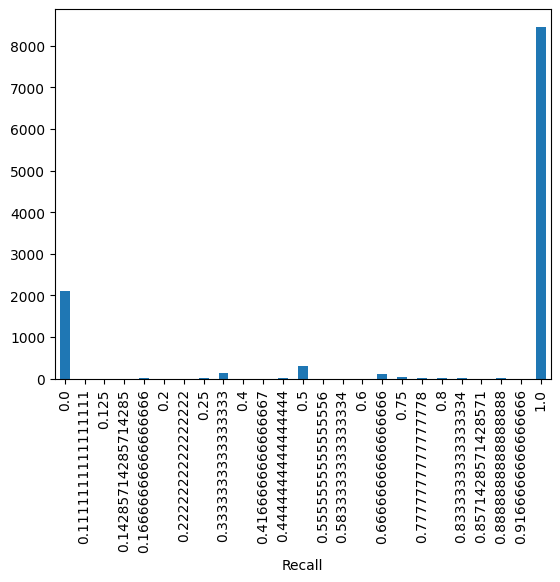

In [82]:
figure()
ax = gca()
res.groupby("Recall").size().plot.bar(ax=ax)

<Axes: ylabel='Frequency'>

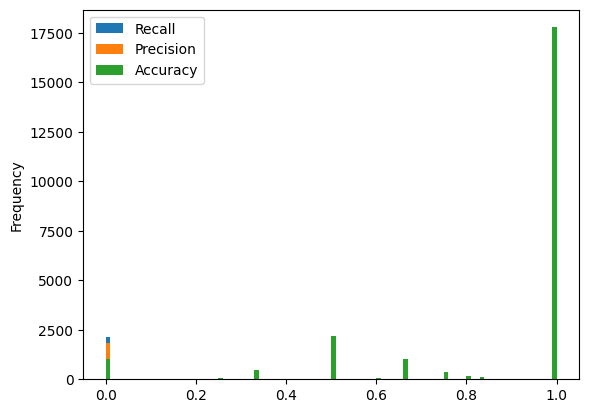

In [80]:
figure()
ax = gca()
res.plot.hist(ax=ax,bins=100)

In [ ]:
res = test_data.groupby(
    [
        "carrier_code",
        "flight_number",
        "travel_date",
        "upgrade_type"
    ],
    observed=True
).apply(
        lambda x: pd.Series((np.nan, np.nan, np.nan), index=["Recall", "Precision", "Accuracy"]) 
        if (x.shape[0]==1 or (x["actual"]==1).sum()==0)
        else pd.Series(
            (
                recall_score(x["actual"], x["prediction"]),
                precision_score(x["actual"], x["prediction"]),
                accuracy_score(x["actual"], x["prediction"])
            ),
            index=["Recall", "Precision", "Accuracy"]
    )
)
res

/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/myenv/lib/py

carrier_code  flight_number  travel_date  upgrade_type
AC            1              2025-05-01   P-ECON          (1.0, 0.3333333333333333, 0.3333333333333333)
                             2025-05-02   BUS                                           (nan, nan, nan)
                                          P-ECON                                        (1.0, 1.0, 1.0)
                             2025-05-03   P-ECON                                        (nan, nan, nan)
                             2025-05-04   P-ECON                                        (0.0, 0.0, 1.0)
                                                                              ...                      
LO            99             2025-09-08   P-ECON                                        (1.0, 0.5, 0.5)
                             2025-09-13   BUS                            (0.0, 0.0, 0.6666666666666666)
                                          P-ECON                                        (0.0, 0.0, 1.0)
         

carrier_code  flight_number  travel_date  upgrade_type
LO            99             2025-09-15   P-ECON           1
              268            2025-06-23   BUS              1
                             2025-06-19   BUS              1
AC            741            2025-07-13   BUS              1
                             2025-07-14   BUS              1
                                                          ..
              34             2025-06-28   P-ECON          24
              33             2025-07-20   BUS             24
              895            2025-09-14   P-ECON          24
              34             2025-05-22   BUS             24
              33             2025-09-12   BUS             36
Length: 61097, dtype: int64

In [ ]:
df_offers[offer_cols + details_cols]["utc_diff"][0]

np.int64(0)

In [7]:
pipeline3[-1].cb_params

{'task_type': 'CPU',
 'devices': '0',
 'loss_function': 'Logloss',
 'eval_metric': 'AUC',
 'random_state': 42,
 'auto_class_weights': 'Balanced'}

In [ ]:
pipeline3 = mlflow.sklearn.load_model("runs:/e16fb7d16419475caf1cac639f743439/pipeline")

In [28]:
help(CatBoostClassifier.fit)

Help on function fit in module catboost.core:

fit(self, X, y=None, cat_features=None, text_features=None, embedding_features=None, graph=None, sample_weight=None, baseline=None, use_best_model=None, eval_set=None, verbose=None, logging_level=None, plot=False, plot_file=None, column_description=None, verbose_eval=None, metric_period=None, silent=None, early_stopping_rounds=None, save_snapshot=None, snapshot_file=None, snapshot_interval=None, init_model=None, callbacks=None, log_cout=None, log_cerr=None)
    Fit the CatBoostClassifier model.
    
    Parameters
    ----------
    X : catboost.Pool or list or numpy.ndarray or pandas.DataFrame or pandas.Series
        If not catboost.Pool, 2 dimensional Feature matrix or string - file with dataset.
    
    y : list or numpy.ndarray or pandas.DataFrame or pandas.Series, optional (default=None)
        Labels of the training data.
        If not None, can be a single- or two- dimensional array with either:
          - numerical values - fo

In [ ]:
mlflow.catboost.mlflow.

<module 'mlflow.catboost' from '/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/mlflow/catboost/__init__.py'>

In [ ]:
from mlflow.catboost

In [24]:
from catboost import CatBoost.Callback

SyntaxError: invalid syntax (204011874.py, line 1)

'file:///Users/christopher.gauthier/Documents/old-bid-predictor/mlruns'

In [3]:
registered = client.search_registered_models()

In [4]:
client = MlflowClient()
rows = []
for rm in client.search_registered_models():
    for mv in client.search_model_versions(f"name='{rm.name}'"):
        rows.append({
            "name": mv.name,
            "version": int(mv.version),
            "stage": mv.current_stage,
            "run_id": mv.run_id,
            "created": pd.to_datetime(mv.creation_timestamp, unit="ms"),
            "last_updated": pd.to_datetime(mv.last_updated_timestamp, unit="ms"),
            "source": mv.source,
        })

pd.DataFrame(rows).sort_values(["name", "version"])

name  version stage                            run_id  \
0  bid-predictor        1  None  e16fb7d16419475caf1cac639f743439   

                  created            last_updated  \
0 2025-10-03 14:30:00.820 2025-10-03 14:30:00.820   

                                              source  
0  file:///Users/christopher.gauthier/Documents/b...

In [21]:
data = pd.read_csv(
    "bid_data_enriched_new.csv",
    parse_dates=["travel_date"],
    dtype={
        "carrier_code": "category",
        "flight_number": "category",
        "fare_class": "category",
    },
    low_memory=False,
)

In [31]:
502807 + 105676

608483

In [39]:
-np.log10(.35)

np.float64(0.4559319556497244)

In [ ]:
data

In [33]:
(data.instant_upgrade==1).sum()

np.int64(0)

In [30]:
data.shape

(608483, 204)

In [17]:
pipeline3 = mlflow.sklearn.load_model("runs:/e16fb7d16419475caf1cac639f743439/pipeline")

In [19]:
pipeline3 = mlflow.sklearn.load_model("runs:/56d3fcd3383f4192974db9ebc8d5b96e/pipeline")

In [20]:
pipeline3

Pipeline(steps=[('group',
                 FunctionTransformer(func=<function add_group_features_wrapper at 0x16b6ae340>)),
                ('bin',
                 FunctionTransformer(func=<function bin_features_wrapper at 0x16b6ae3e0>)),
                ('loo',
                 FunctionTransformer(func=<function add_loo_quantiles_wrapper at 0x16b6ae480>)),
                ('reduce',
                 FunctionTransformer(func=<function reduce_features at 0x16b6ae520>)),
                ('clf',
                 CBC(auto_class_weights='Balanced', eval_metric='AUC',
                     loss_function='Logloss', random_state=42, verbose=0))],
         transform_input=['eval_set'])